In [1]:
import pandas as pd 
data=pd.read_csv("titanic_preprocessed.csv")

In [2]:
data

age     sibsp     parch      fare    0    1    2    3    4    5  \
0     2.301222 -0.534894 -0.474556  4.246850  0.0  0.0  1.0  0.0  0.0  1.0   
1    -1.127599  8.541409  1.993135  0.644773  0.0  0.0  1.0  0.0  0.0  1.0   
2    -0.270394 -0.534894 -0.474556  0.401702  0.0  0.0  1.0  0.0  0.0  1.0   
3    -0.121314 -0.534894 -0.474556  0.401702  0.0  0.0  1.0  0.0  0.0  1.0   
4     0.176844 -0.534894 -0.474556  0.401702  0.0  0.0  1.0  0.0  0.0  1.0   
...        ...       ...       ...       ...  ...  ...  ...  ...  ...  ...   
1204  0.773161 -0.534894 -0.474556 -0.650261  0.0  0.0  1.0  1.0  0.0  0.0   
1205  1.444017 -0.534894 -0.474556 -0.650261  0.0  0.0  1.0  1.0  0.0  0.0   
1206 -0.121314 -0.534894 -0.474556 -0.650261  0.0  0.0  1.0  1.0  0.0  0.0   
1207 -0.121314 -0.534894 -0.474556 -0.650261  0.0  0.0  1.0  1.0  0.0  0.0   
1208 -0.121314 -0.534894 -0.474556 -0.650261  0.0  0.0  1.0  1.0  0.0  0.0   

        6    7  survived  
0     0.0  1.0         0  
1     0.0  1.0         0  
2     0.0  1.0         1  
3     0.0  1.0         0  
4     0.0  1.0         1  
...   ...  ...       ...  
1204  0.0  1.0         0  
1205  0.0  1.0         1  
1206  0.0  1.0         0  
1207  0.0  1.0         0  
1208  0.0  1.0         0  

[1209 rows x 13 columns]

In [3]:
from sklearn.model_selection import train_test_split

X=data.iloc[:, 0:len(data.columns)-1]
Y=data.loc[:, ['survived']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1,random_state=42)

In [4]:
print(Y.size)
print(Y_train.size)
print(Y_test.size)

1209
1088
121


In [5]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

model= Sequential()
model.add(Dense(16,input_dim=len(X_train.columns),activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(Y_train.columns),activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                208       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss="mse",optimizer="rmsprop",metrics=['mae'])

In [7]:
parameters = ['validation_split', 'epochs', 'batch_size']
validation_split_list = [0.1, 0.2, 0.3, 0.4, 0.5]
epochs_list = [10, 50, 100, 150, 200]
batch_size_list = [4, 8, 16, 32, 64]
param_value_dict = {}
param_value_dict[parameters[0]] = validation_split_list
param_value_dict[parameters[1]] = epochs_list
param_value_dict[parameters[2]] = batch_size_list

In [8]:
param_value_dict

{'validation_split': [0.1, 0.2, 0.3, 0.4, 0.5],
 'epochs': [10, 50, 100, 150, 200],
 'batch_size': [4, 8, 16, 32, 64]}

In [9]:
models = {}
results = {}

# validation_split_list = [0.1, 0.2, 0.3, 0.4, 0.5]
models['compare_validation_split'] = {}
results['compare_validation_split'] = {}
for vs in validation_split_list:
    results['compare_validation_split'][vs] = model.fit(X_train,Y_train,validation_split=vs,epochs=50,batch_size=8)
    model.save('model/titanic/compare_validation_split/{}.h5'.format(vs))

# epochs_list = [10, 50, 100, 150, 200]
models['compare_epochs'] = {}
results['compare_epochs'] = {}
for epochs in epochs_list:
    results['compare_epochs'][epochs] = model.fit(X_train,Y_train,validation_split=0.2,epochs=epochs,batch_size=8)
    model.save('model/titanic/compare_epochs/{}.h5'.format(epochs))

# batch_size_list = [4, 8, 12, 16, 20]
models['compare_batch_size'] = {}
results['compare_batch_size'] = {}
for batch_size in batch_size_list:
    results['compare_batch_size'][batch_size] = model.fit(X_train,Y_train,validation_split=0.2,epochs=50,batch_size=batch_size)
    model.save('model/titanic/compare_batch_size/{}.h5'.format(batch_size))

Epoch 1/50
123/123 [==============================] - 0s 1ms/step - loss: 0.2783 - mae: 0.4927 - val_loss: 0.2271 - val_mae: 0.4687
Epoch 2/50
123/123 [==============================] - 0s 823us/step - loss: 0.2458 - mae: 0.4580 - val_loss: 0.2062 - val_mae: 0.4419
Epoch 3/50
123/123 [==============================] - 0s 589us/step - loss: 0.2298 - mae: 0.4381 - val_loss: 0.1916 - val_mae: 0.4196
Epoch 4/50
123/123 [==============================] - 0s 594us/step - loss: 0.2083 - mae: 0.4149 - val_loss: 0.1789 - val_mae: 0.3950
Epoch 5/50
123/123 [==============================] - 0s 590us/step - loss: 0.2096 - mae: 0.4035 - val_loss: 0.1731 - val_mae: 0.3831
Epoch 6/50
123/123 [==============================] - 0s 592us/step - loss: 0.2029 - mae: 0.3892 - val_loss: 0.1697 - val_mae: 0.3695
Epoch 7/50
123/123 [==============================] - 0s 597us/step - loss: 0.1939 - mae: 0.3736 - val_loss: 0.1657 - val_mae: 0.3596
Epoch 8/50
123/123 [==============================] - 0s 587us/s

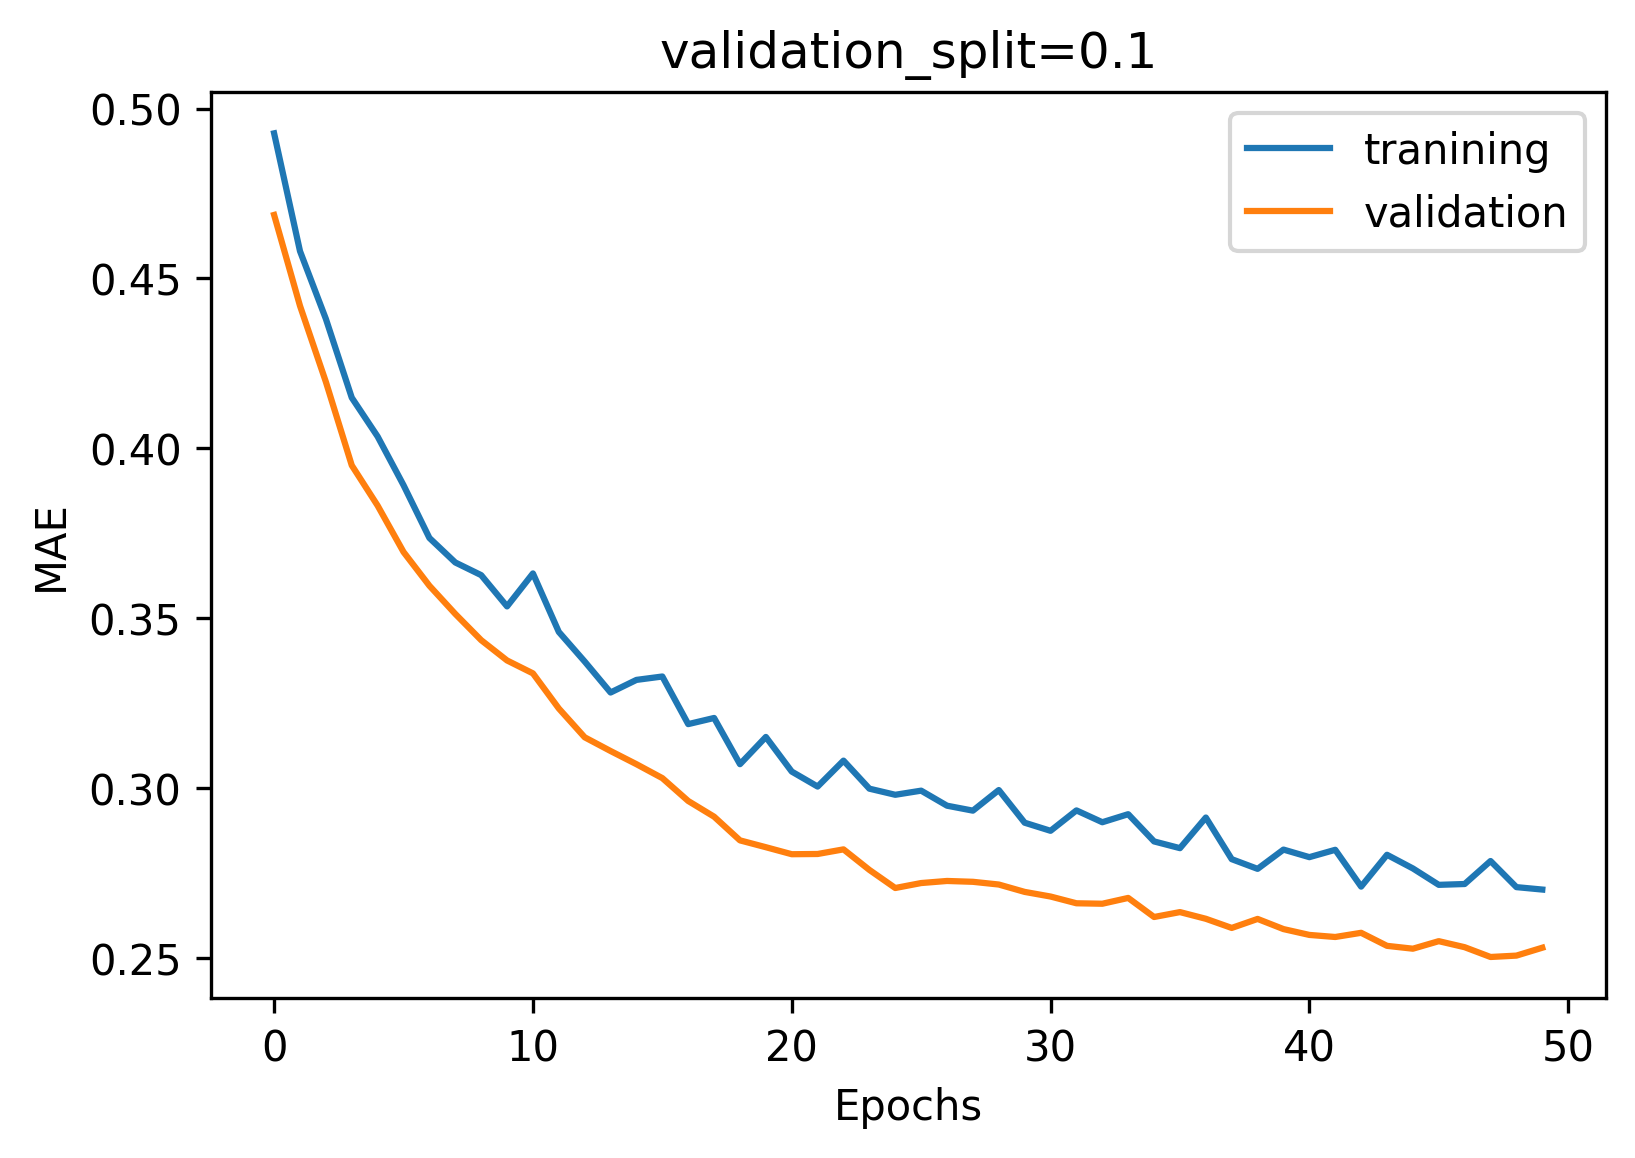

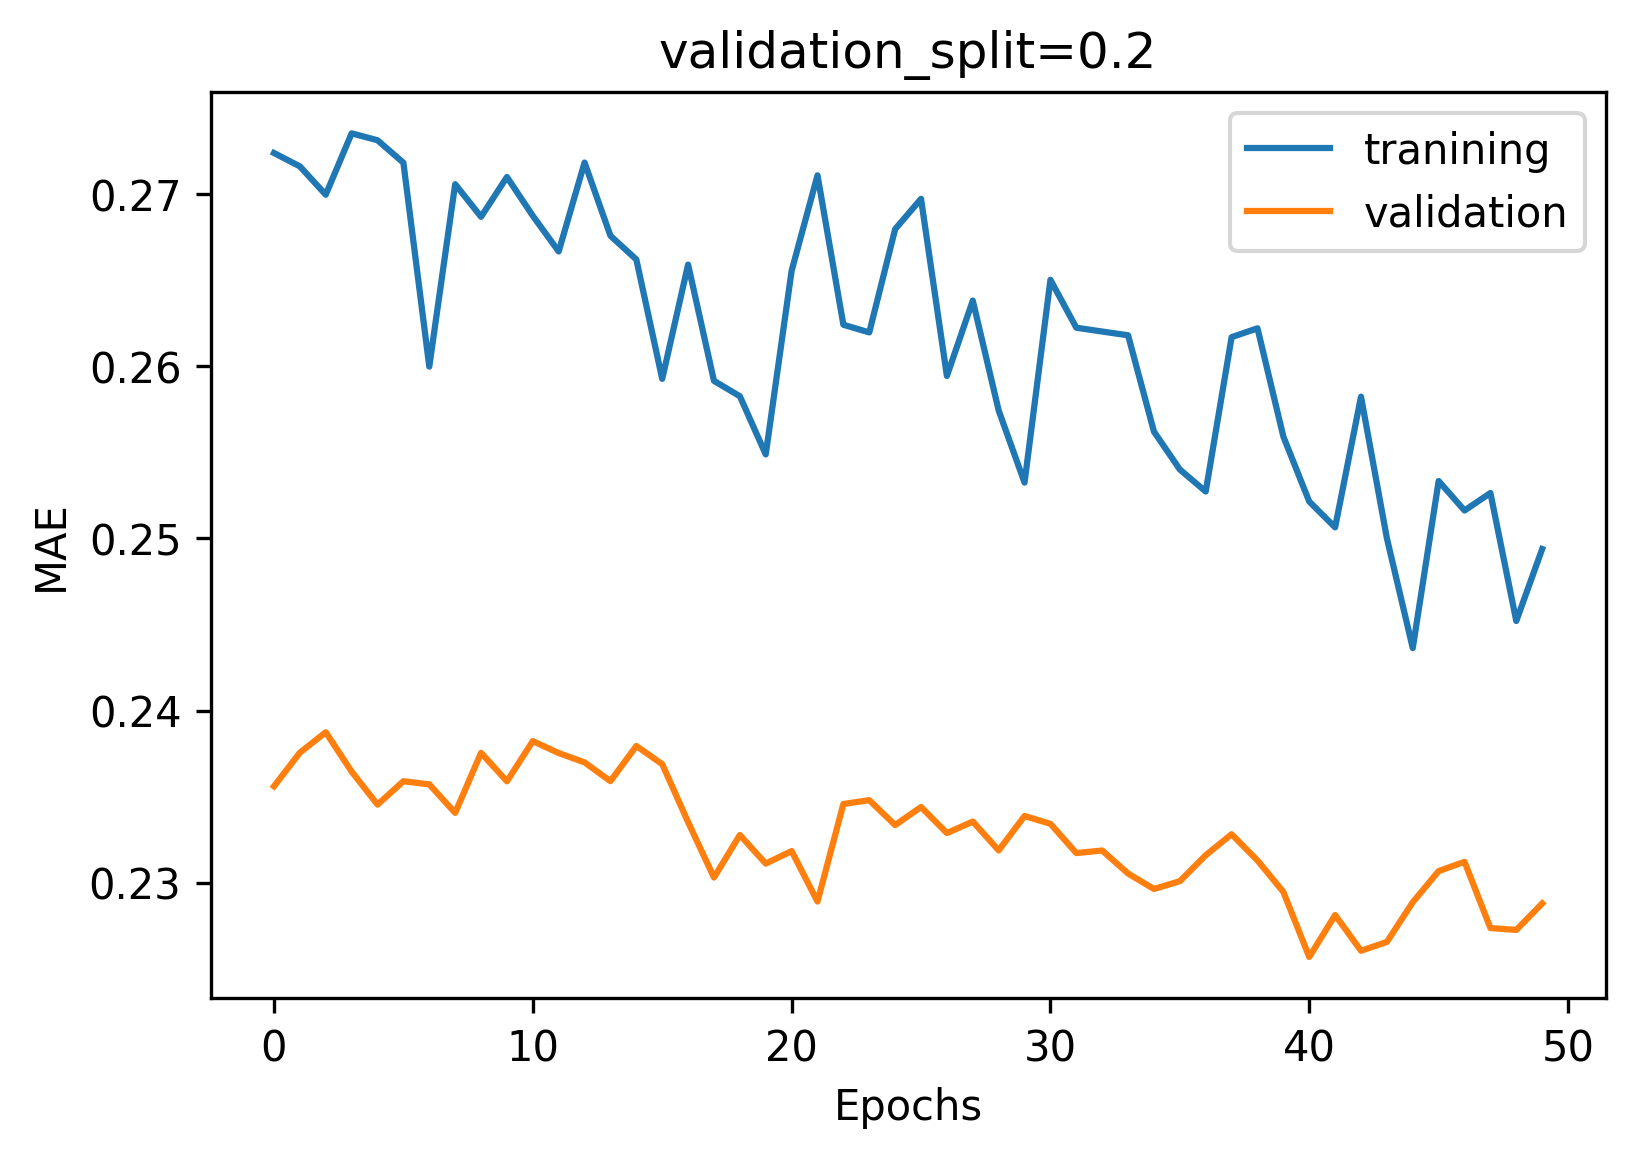

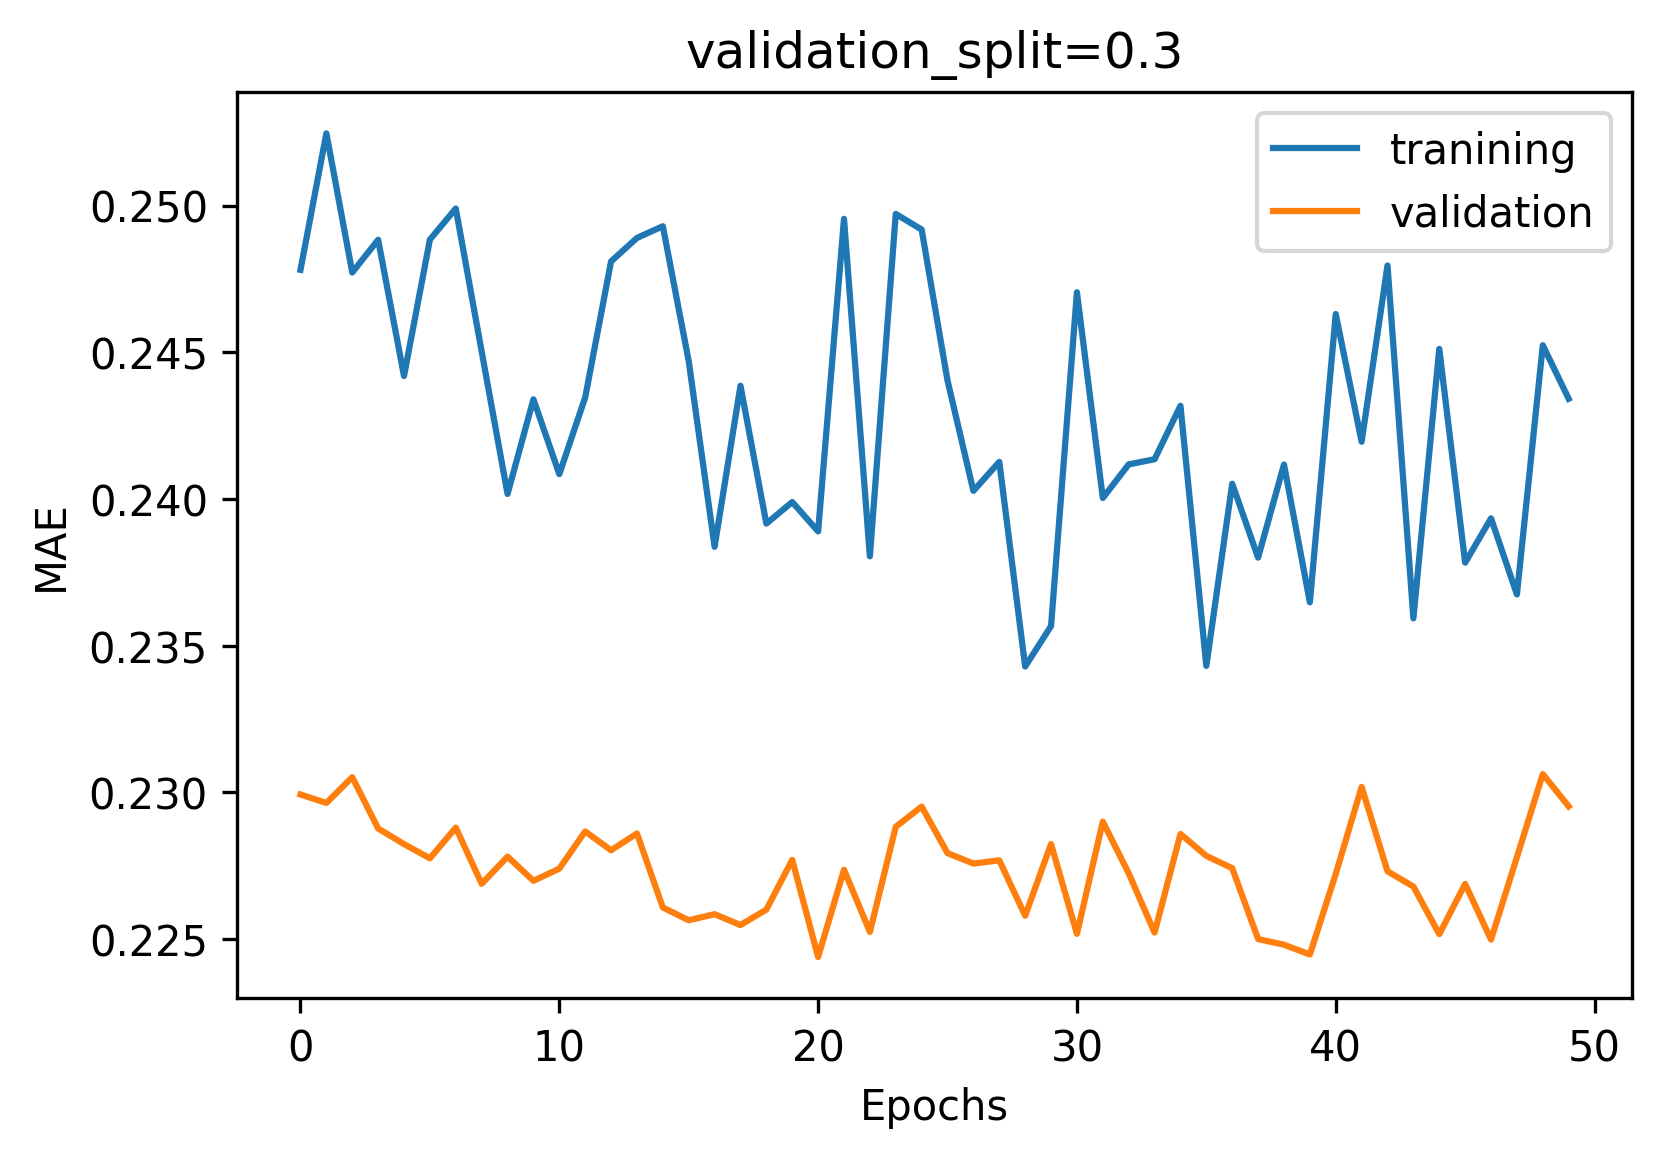

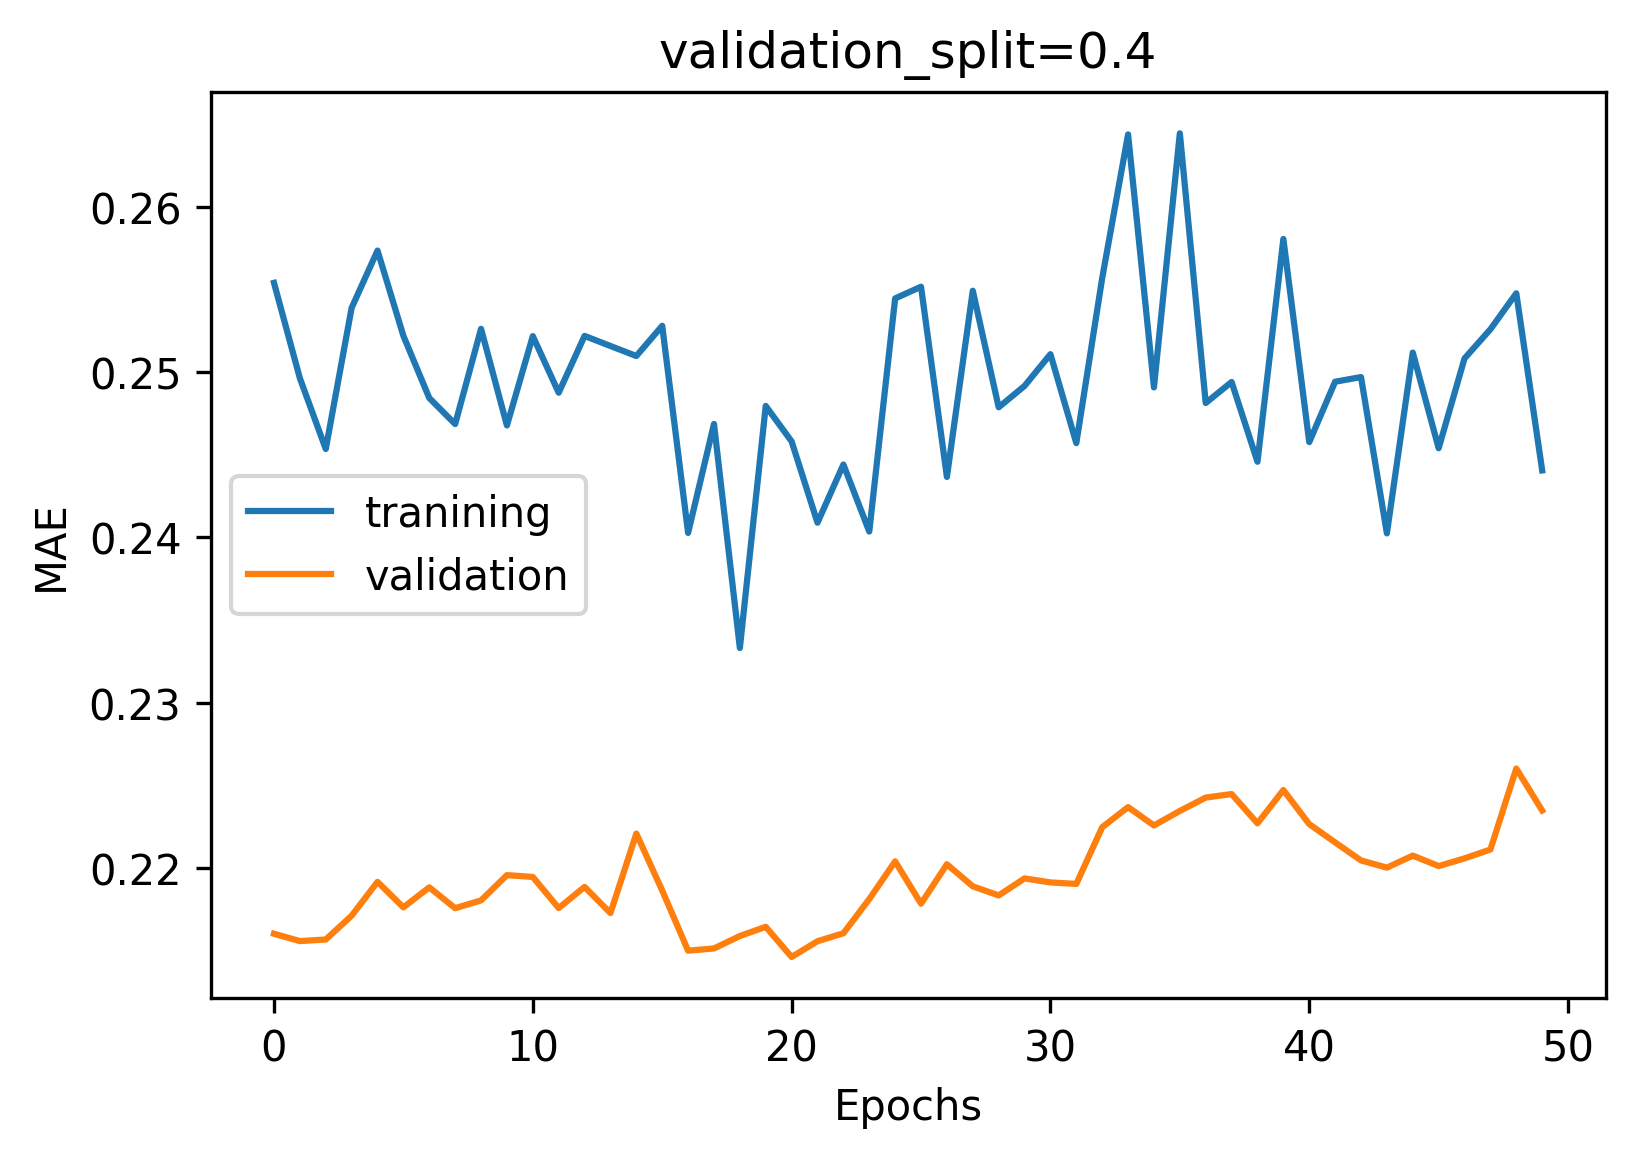

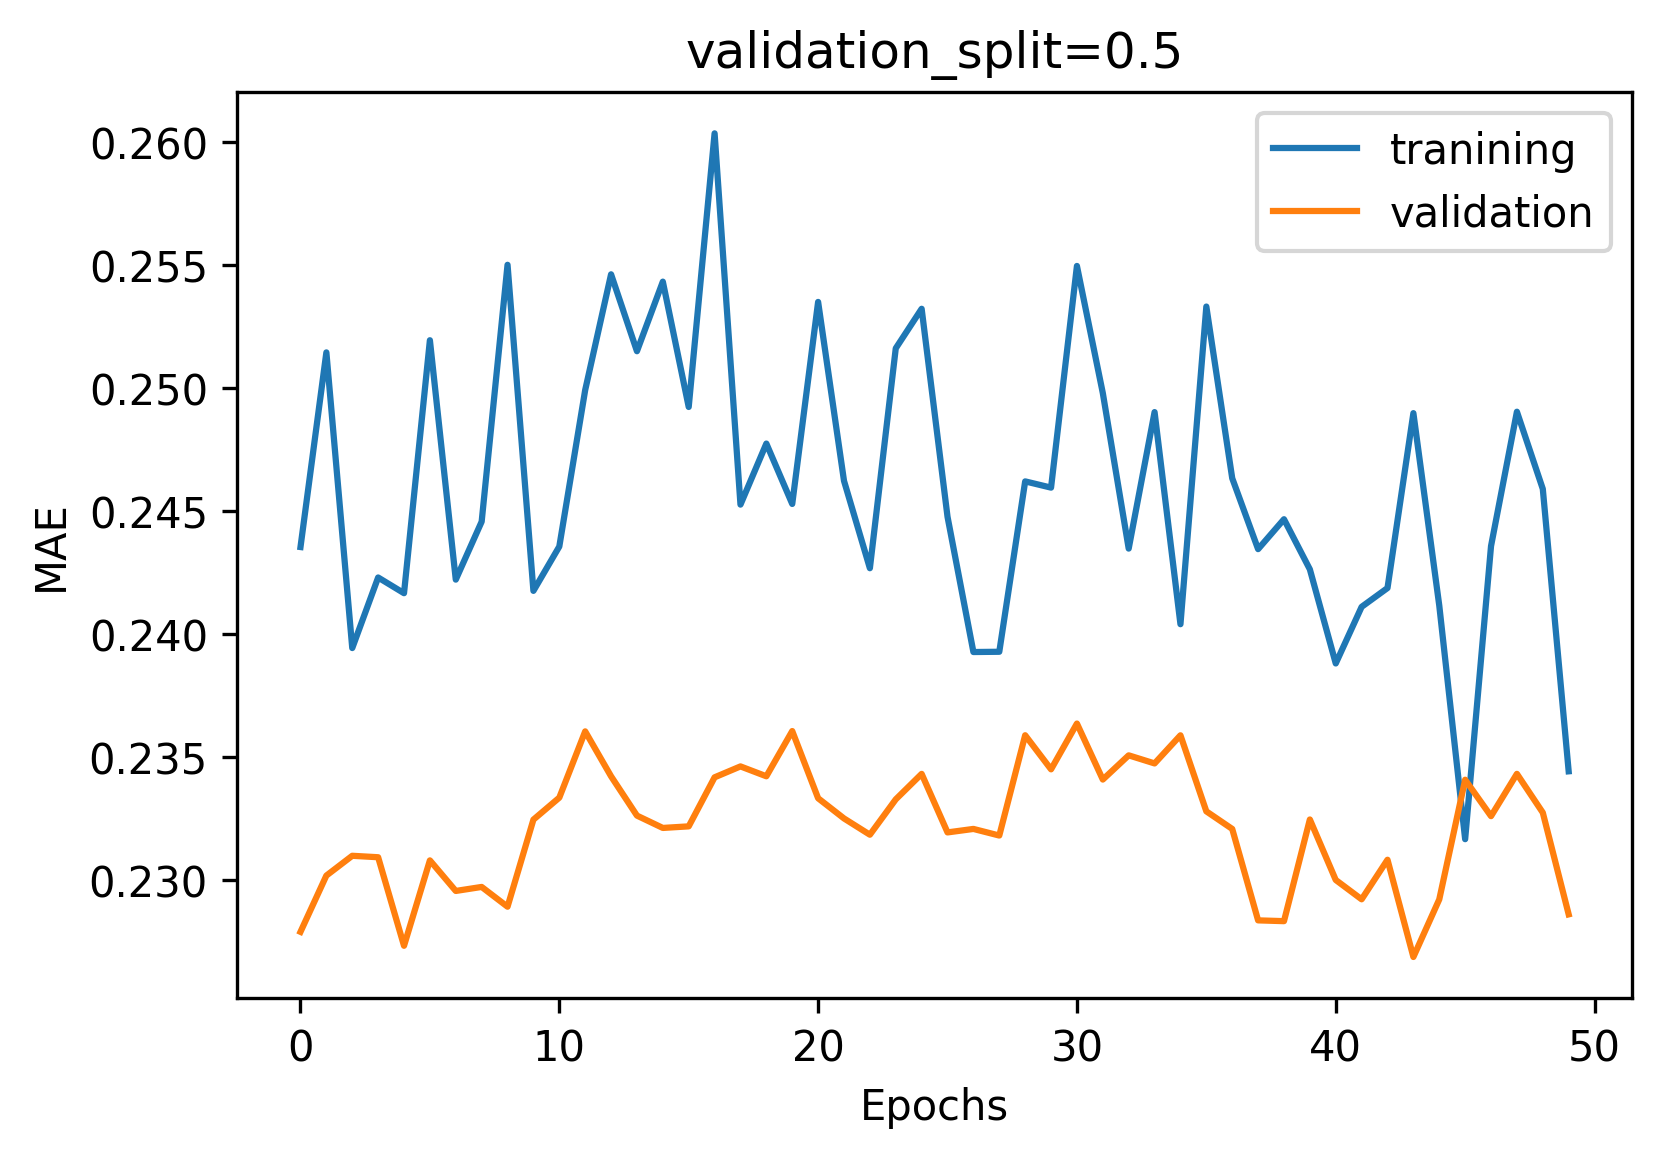

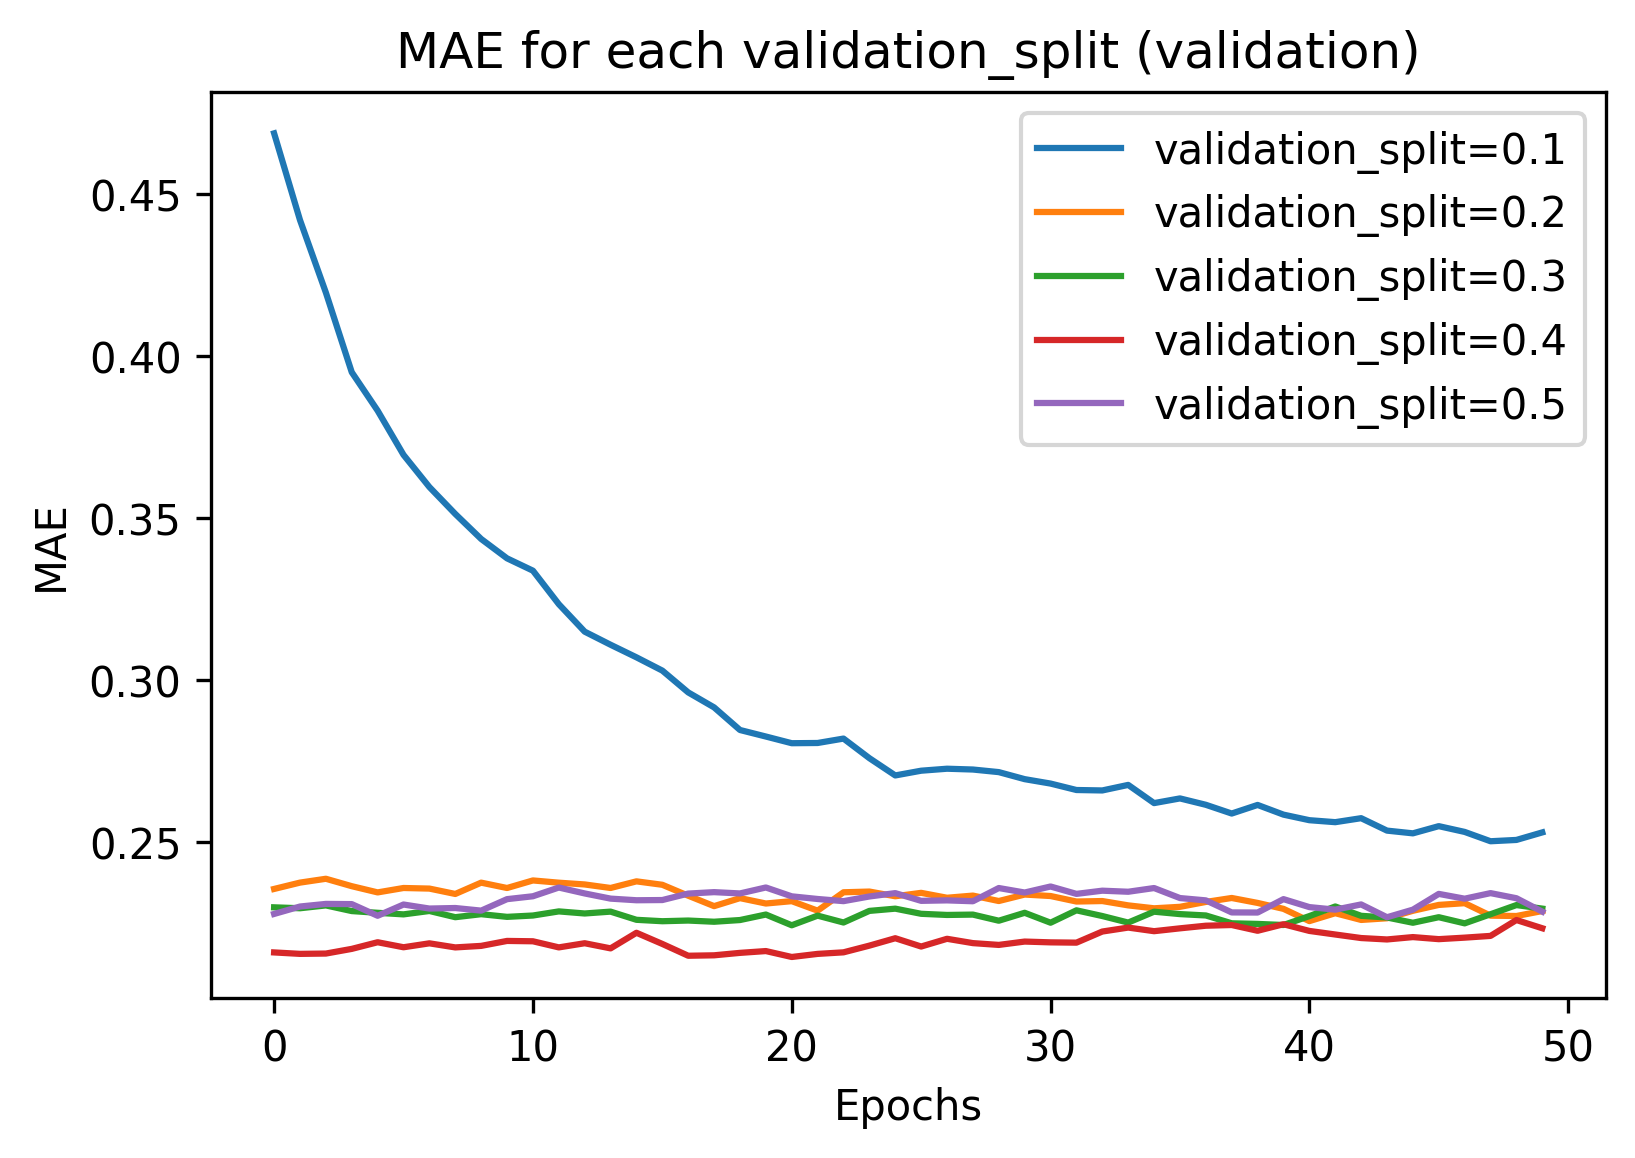

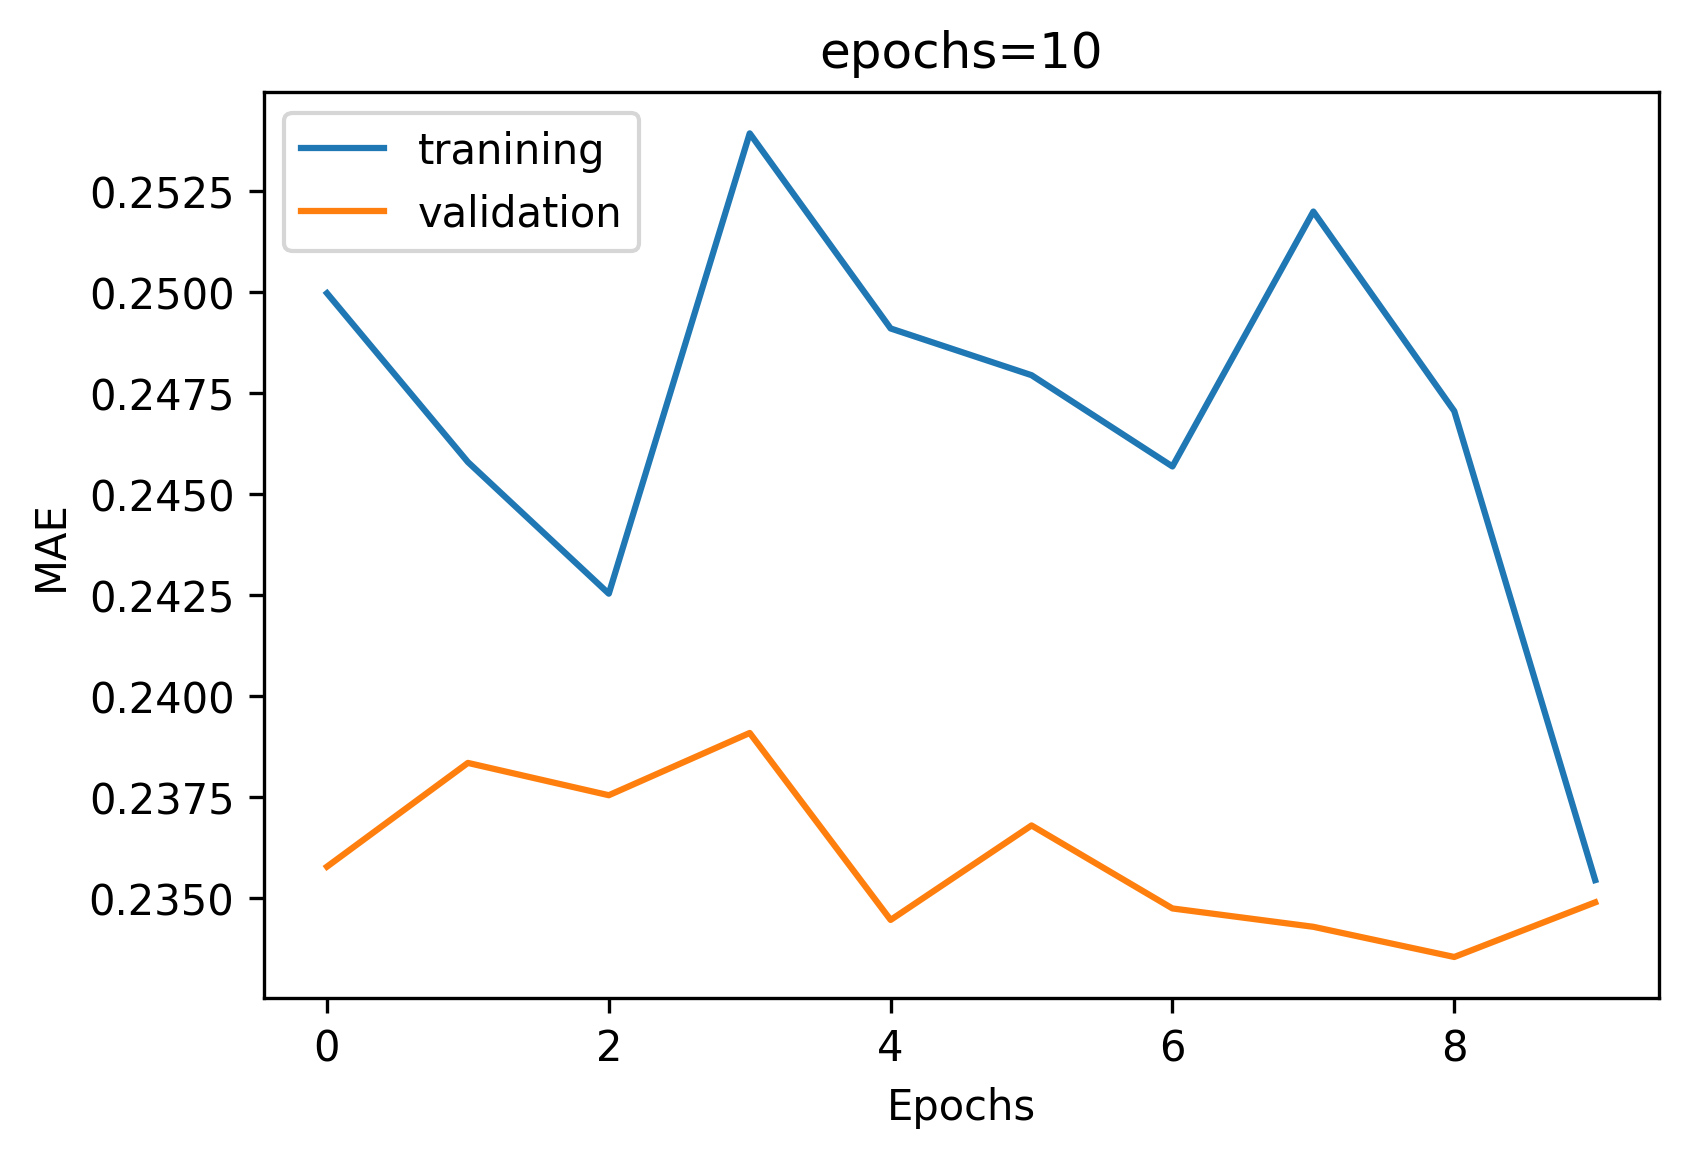

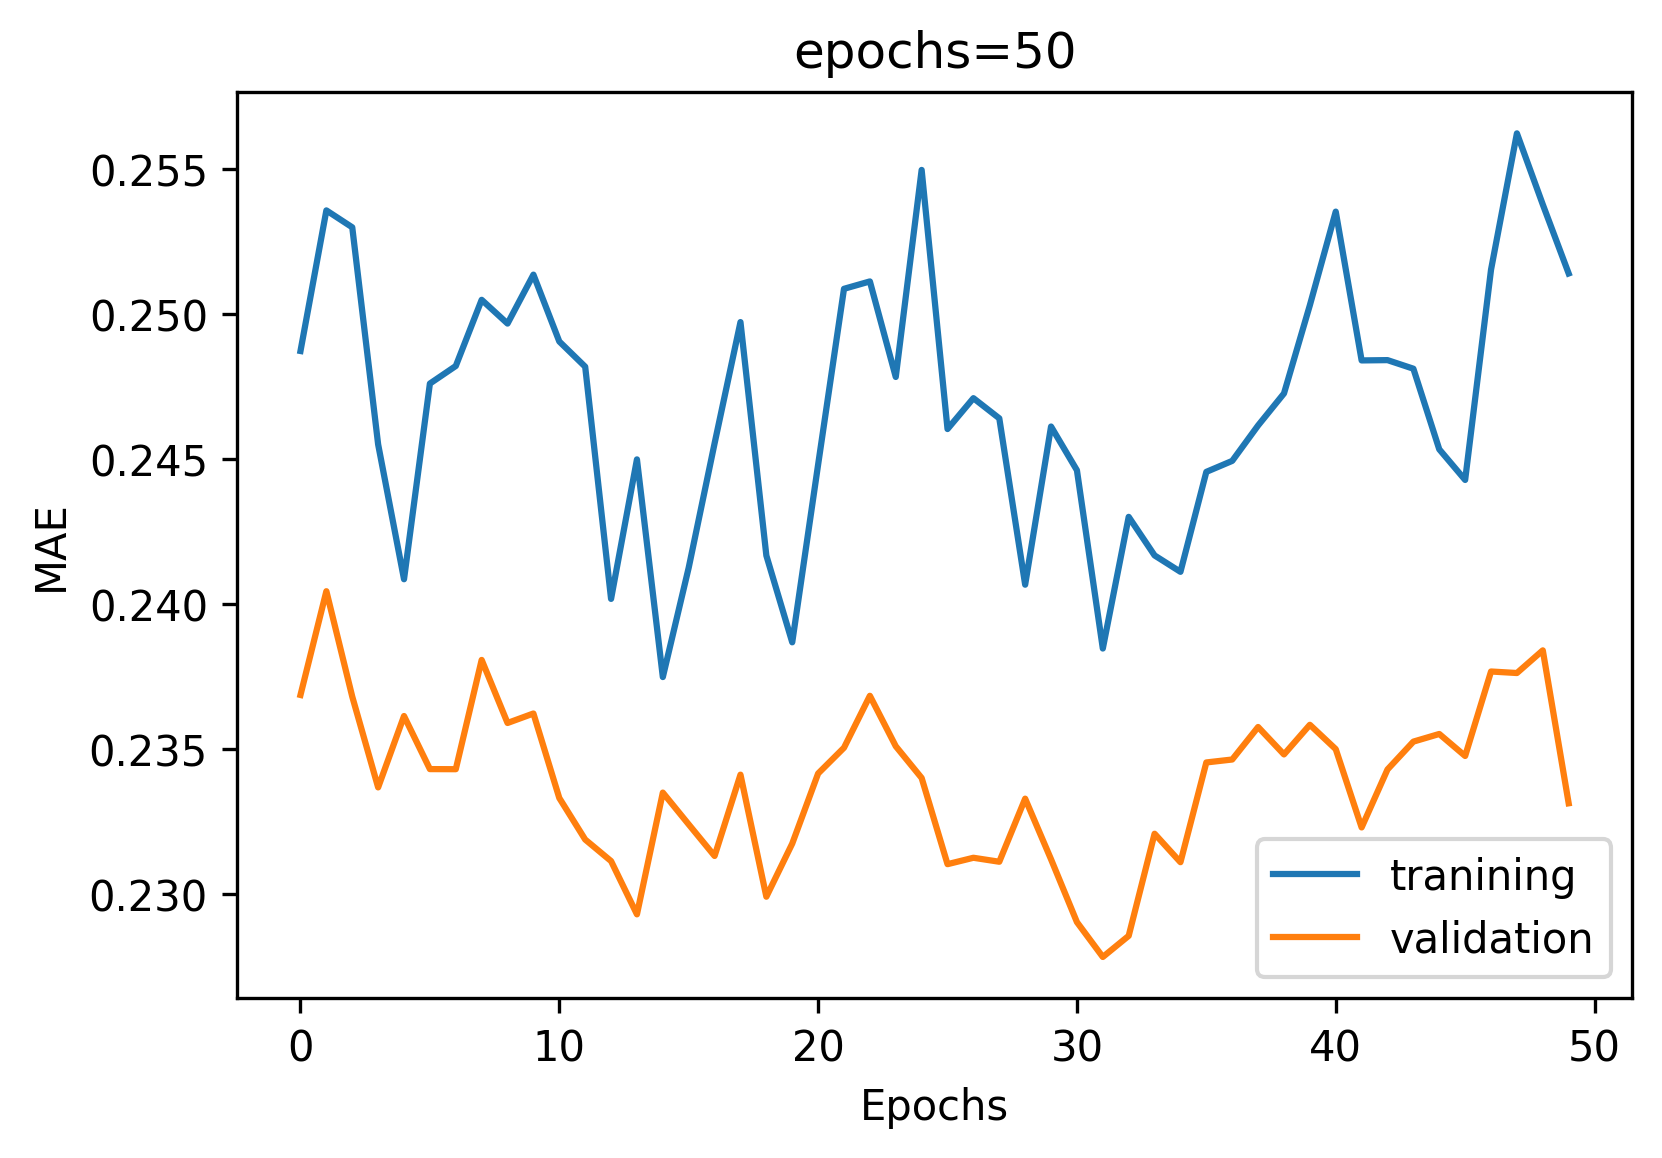

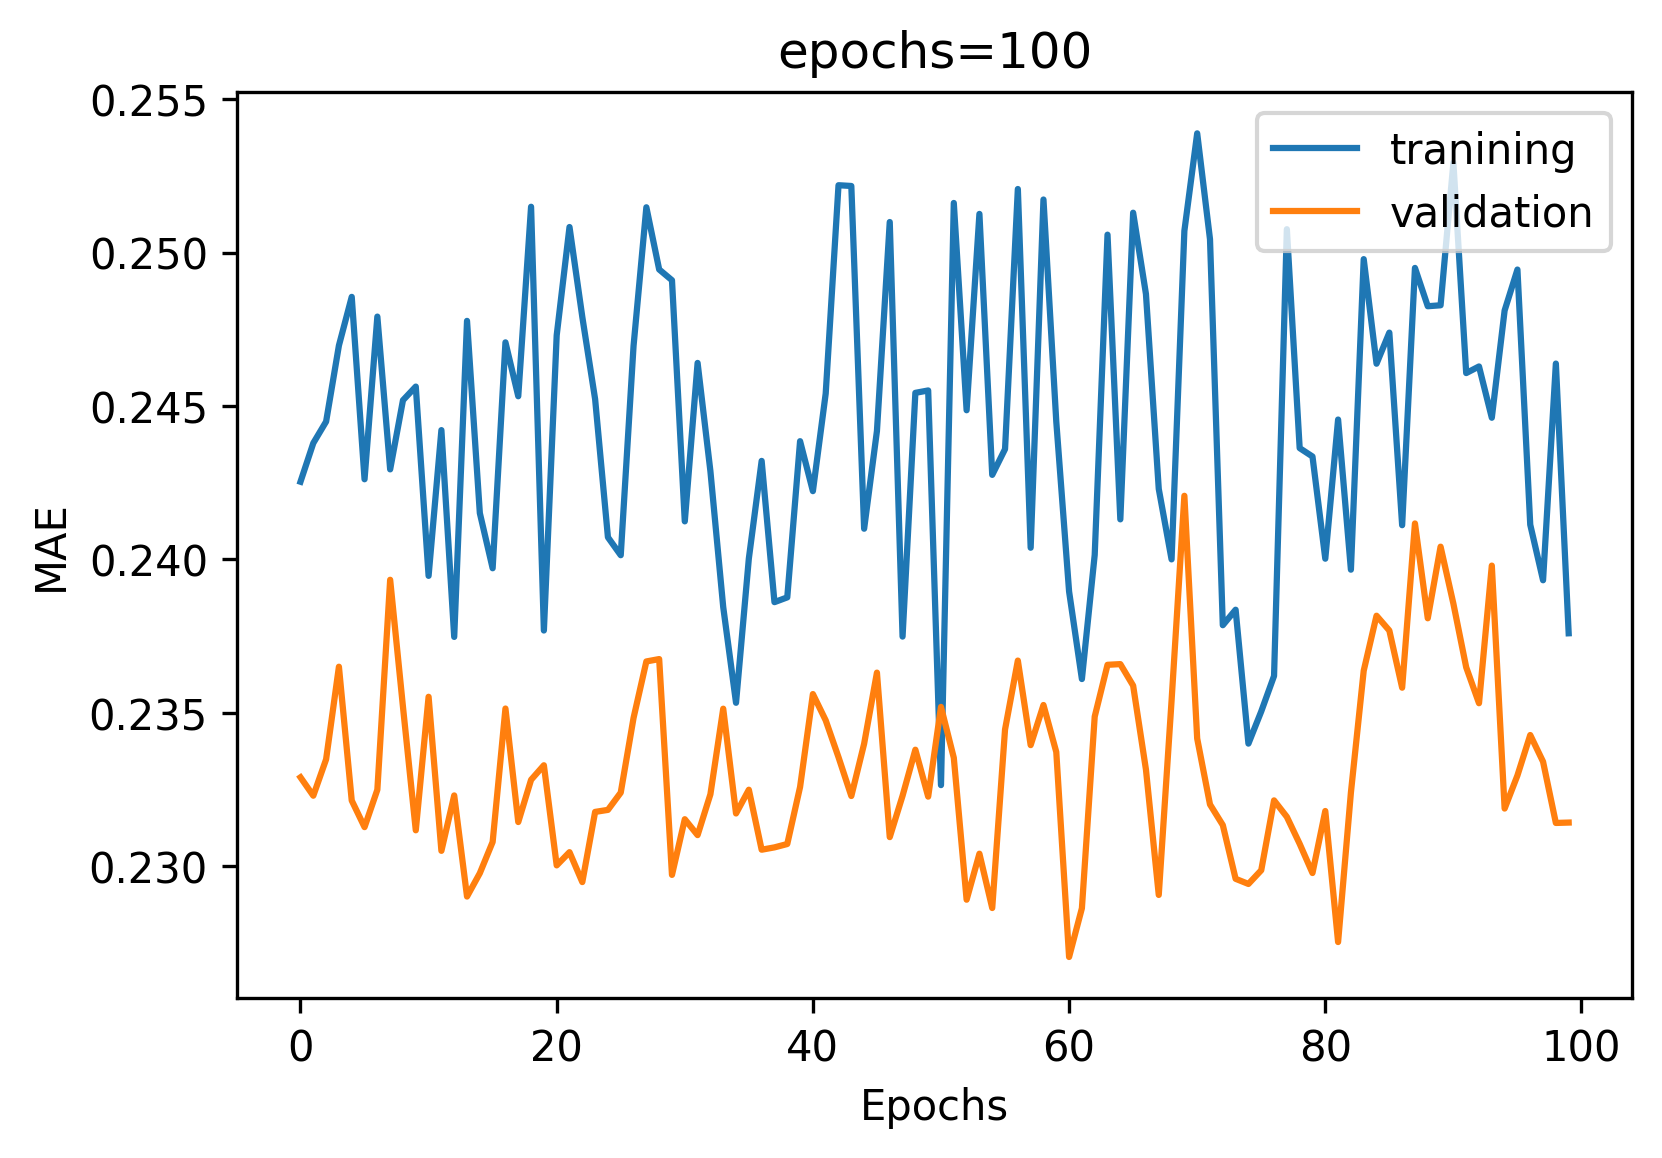

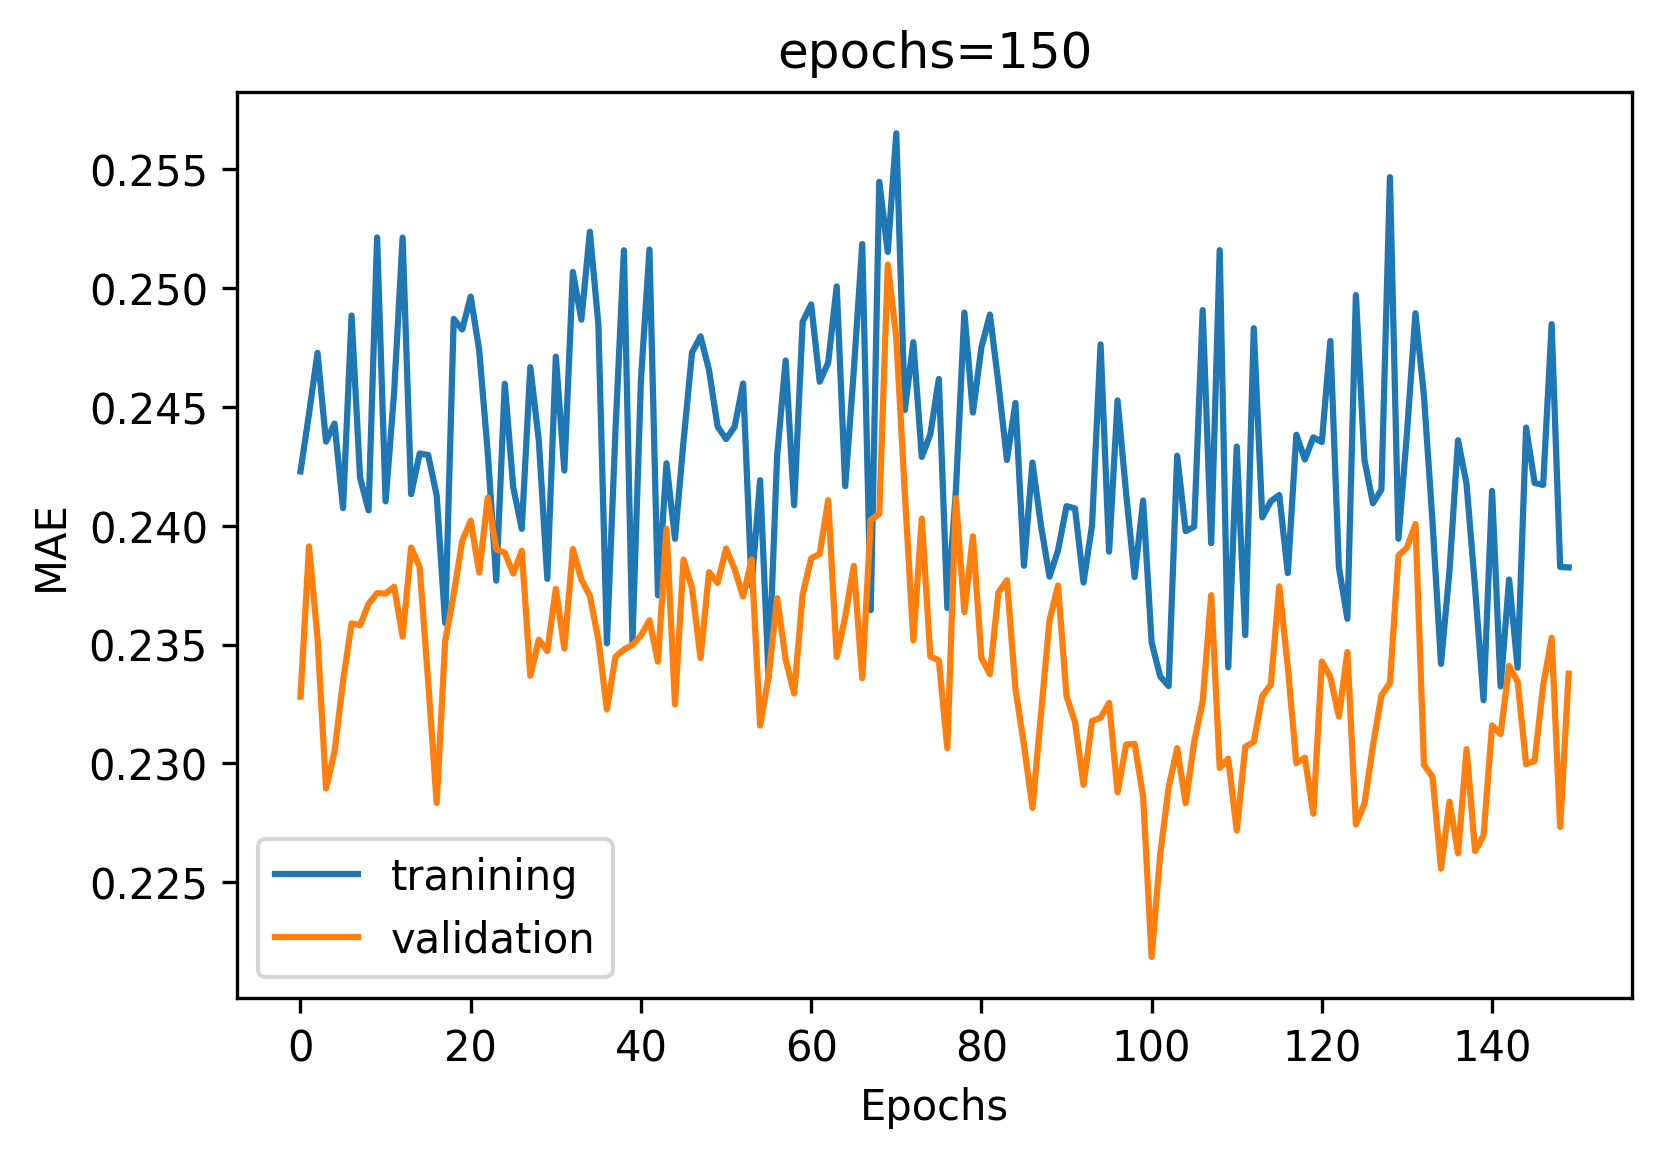

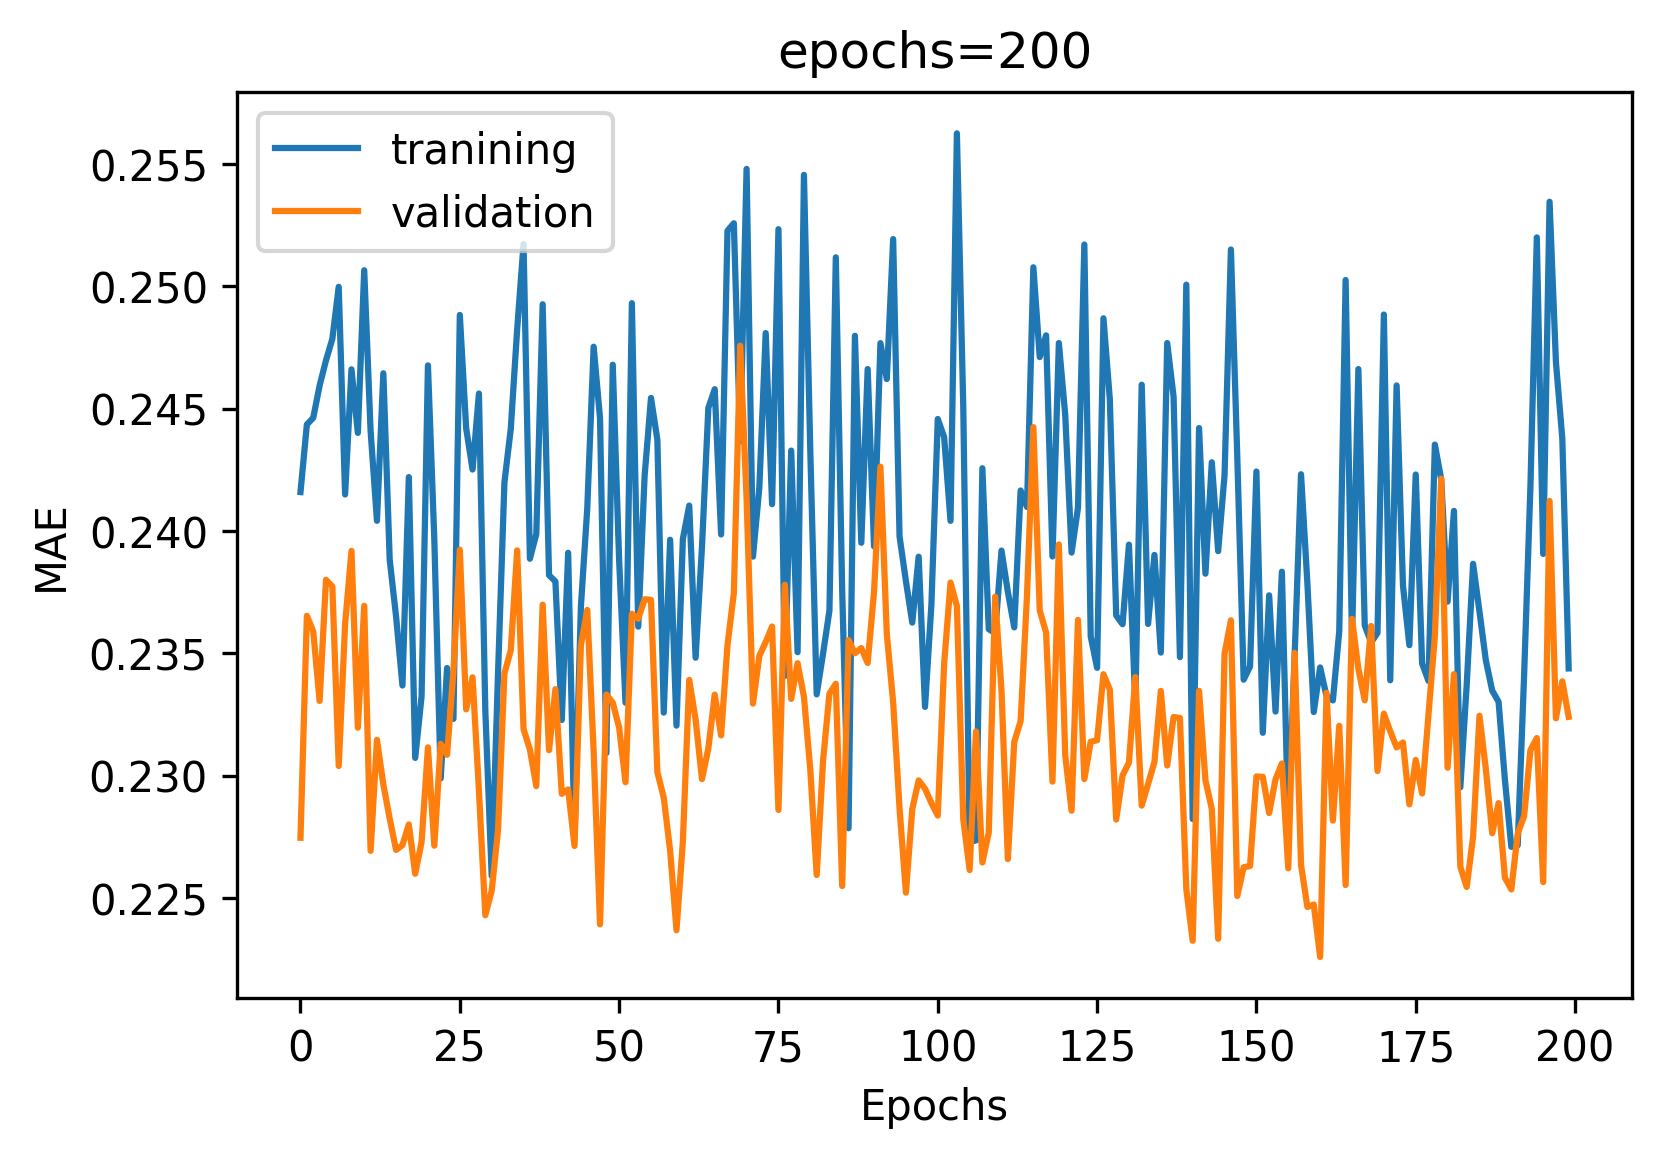

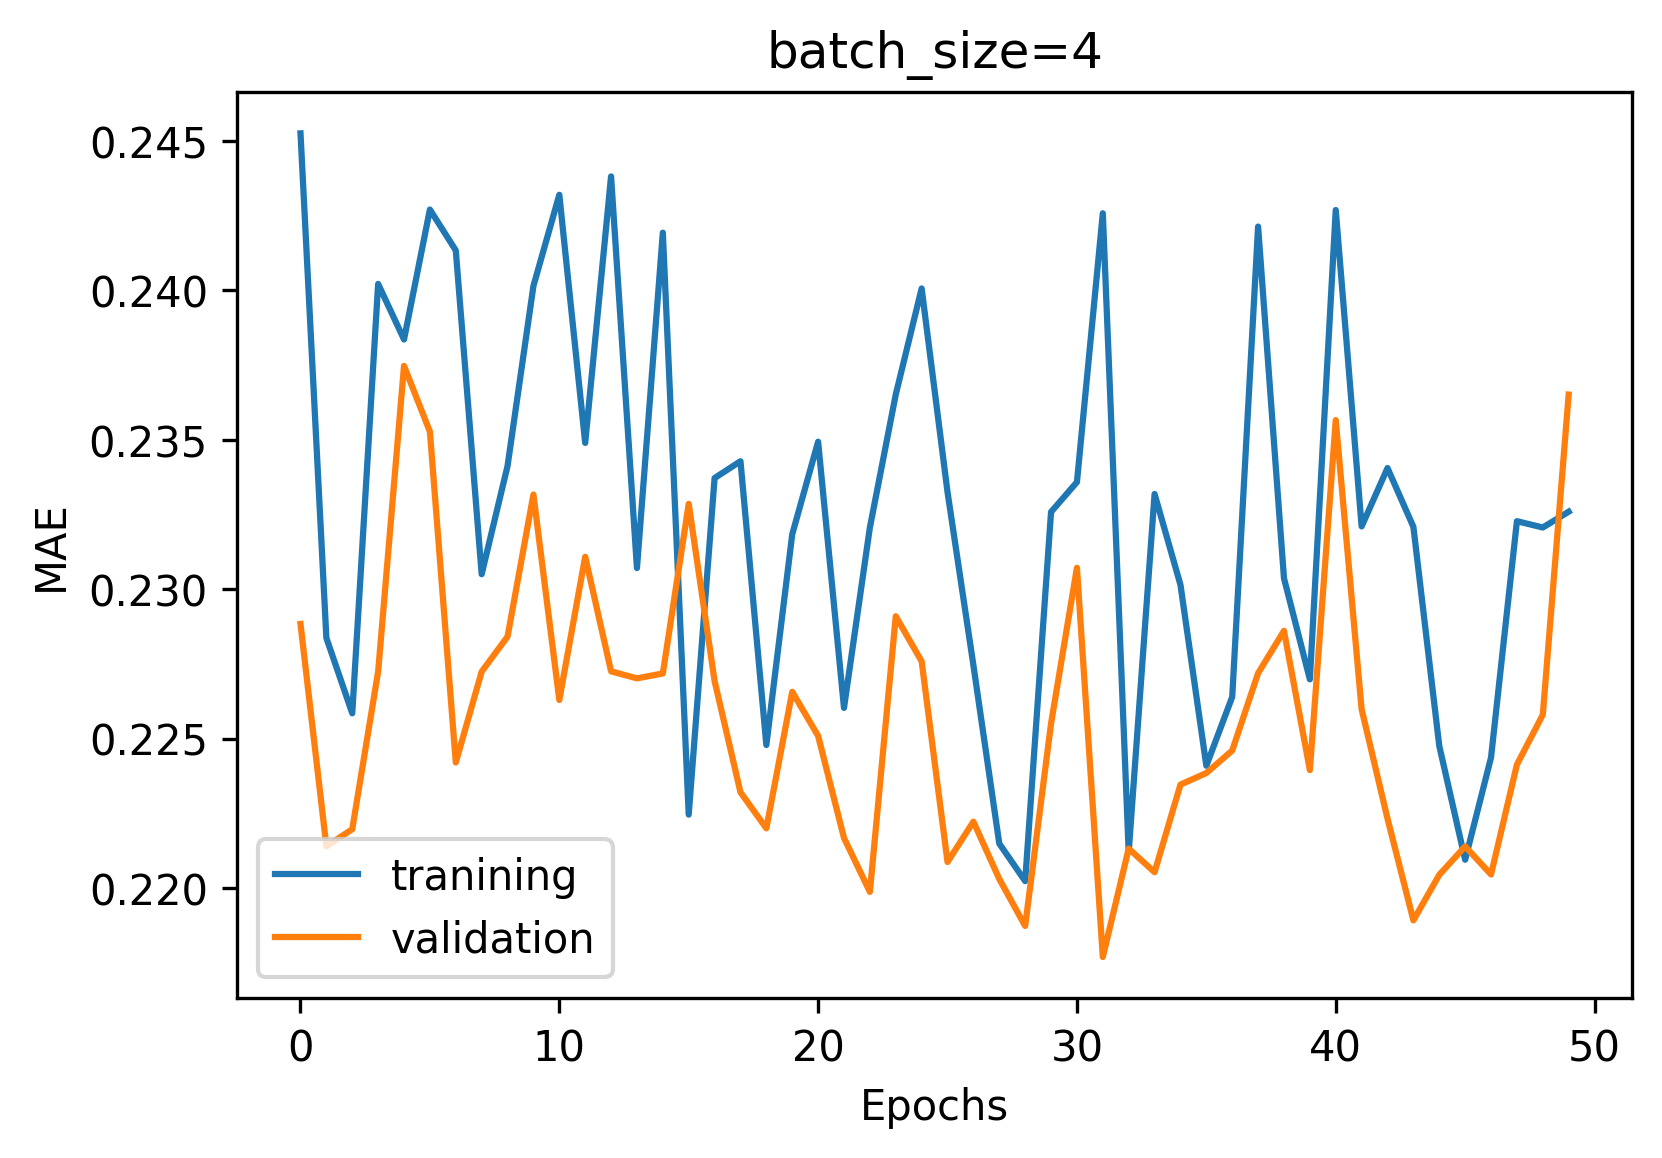

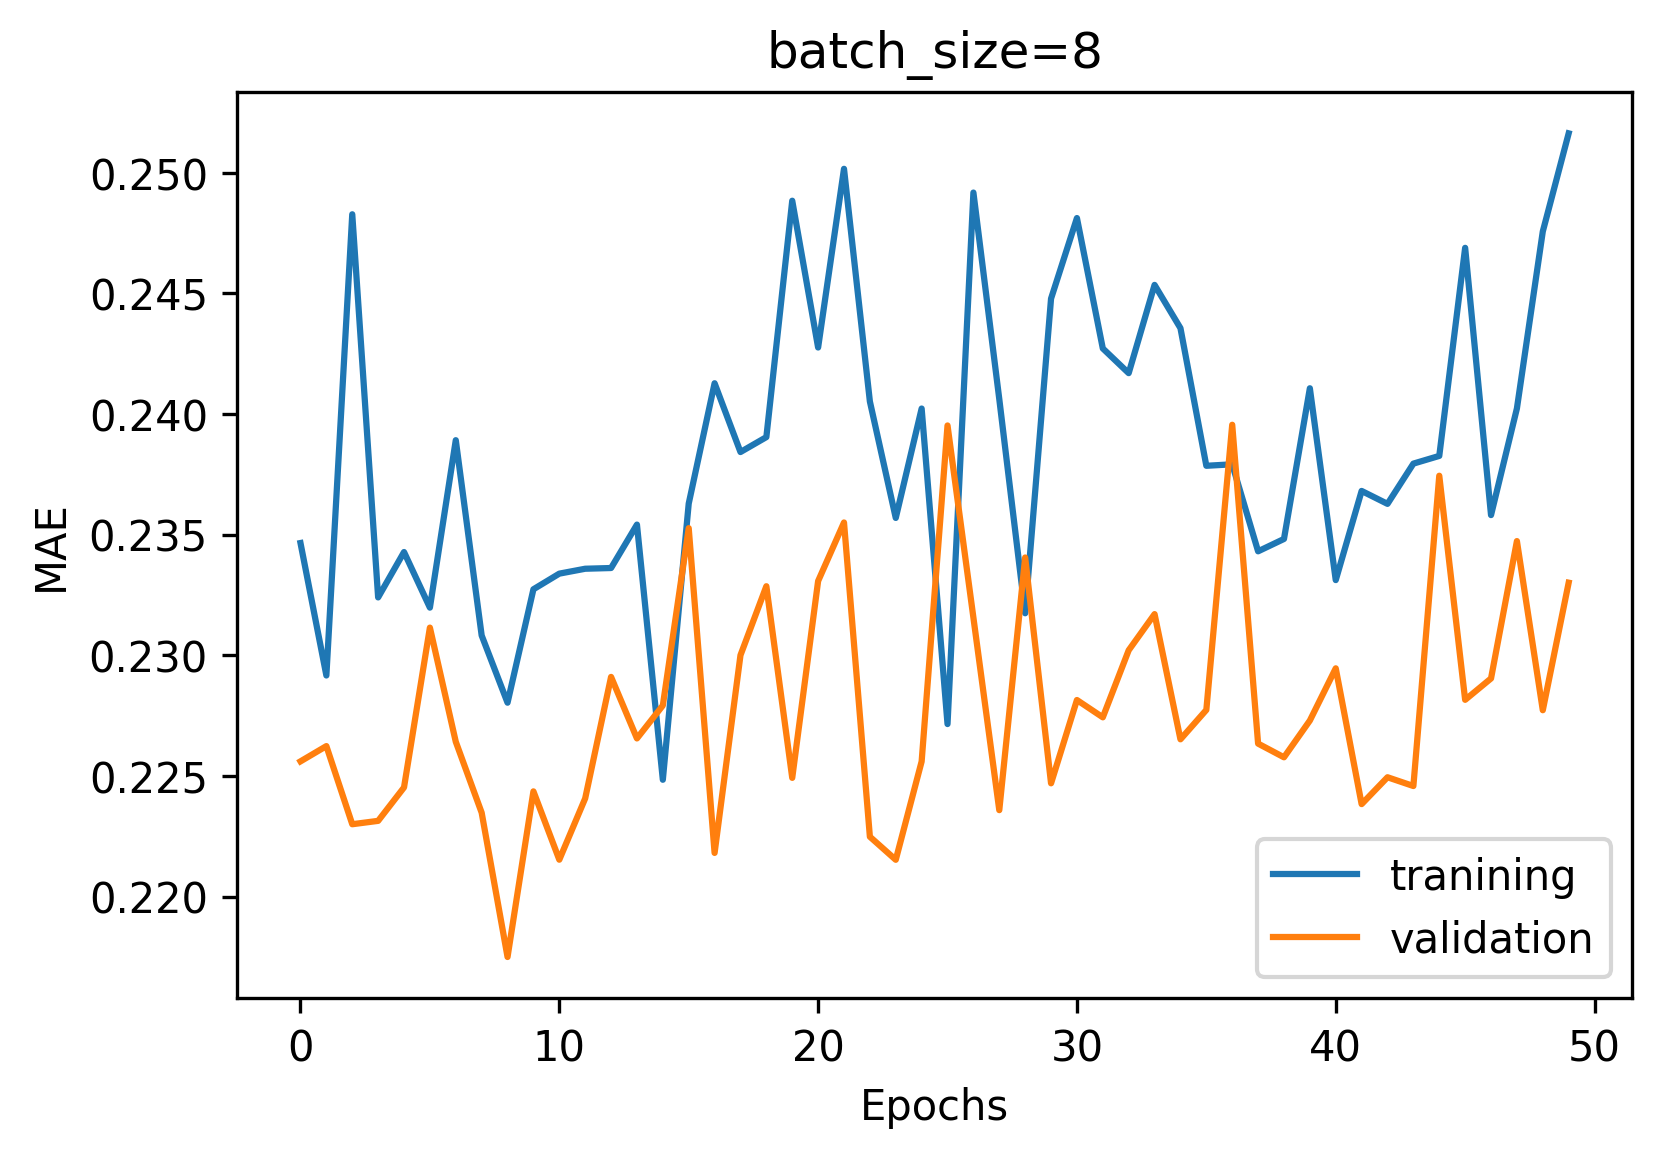

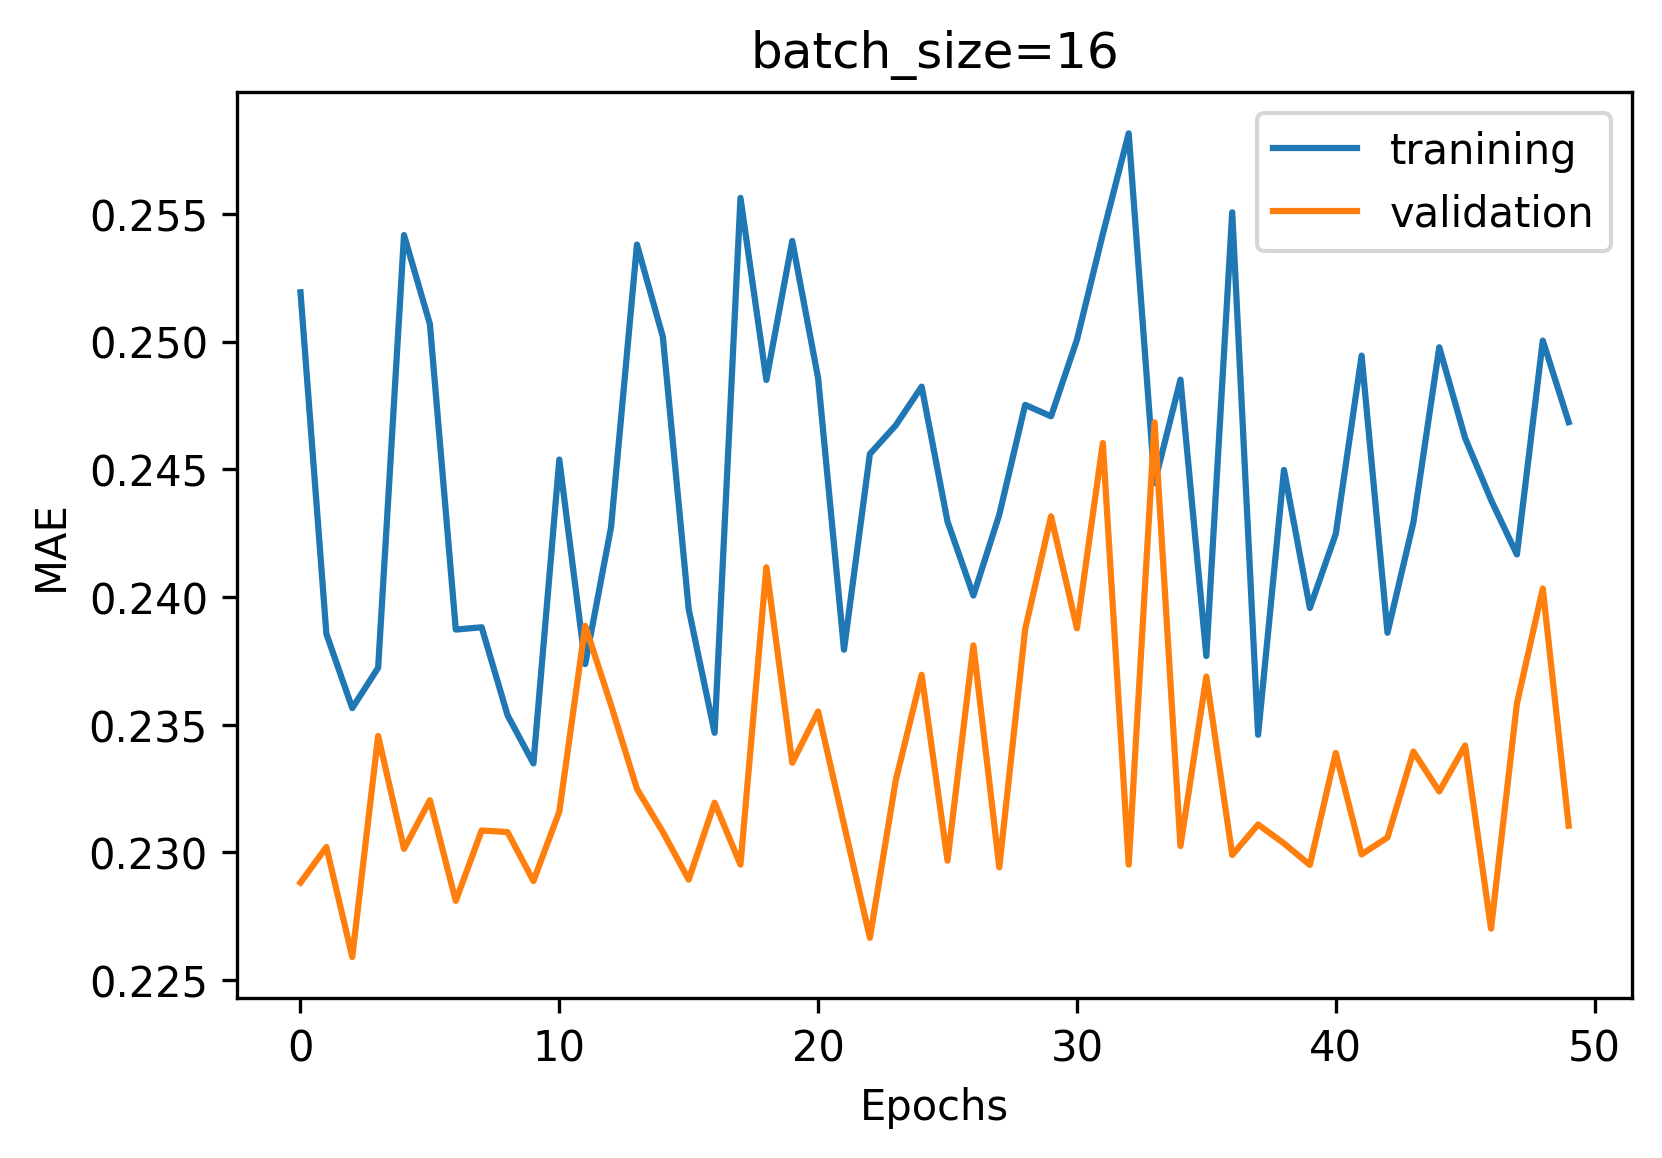

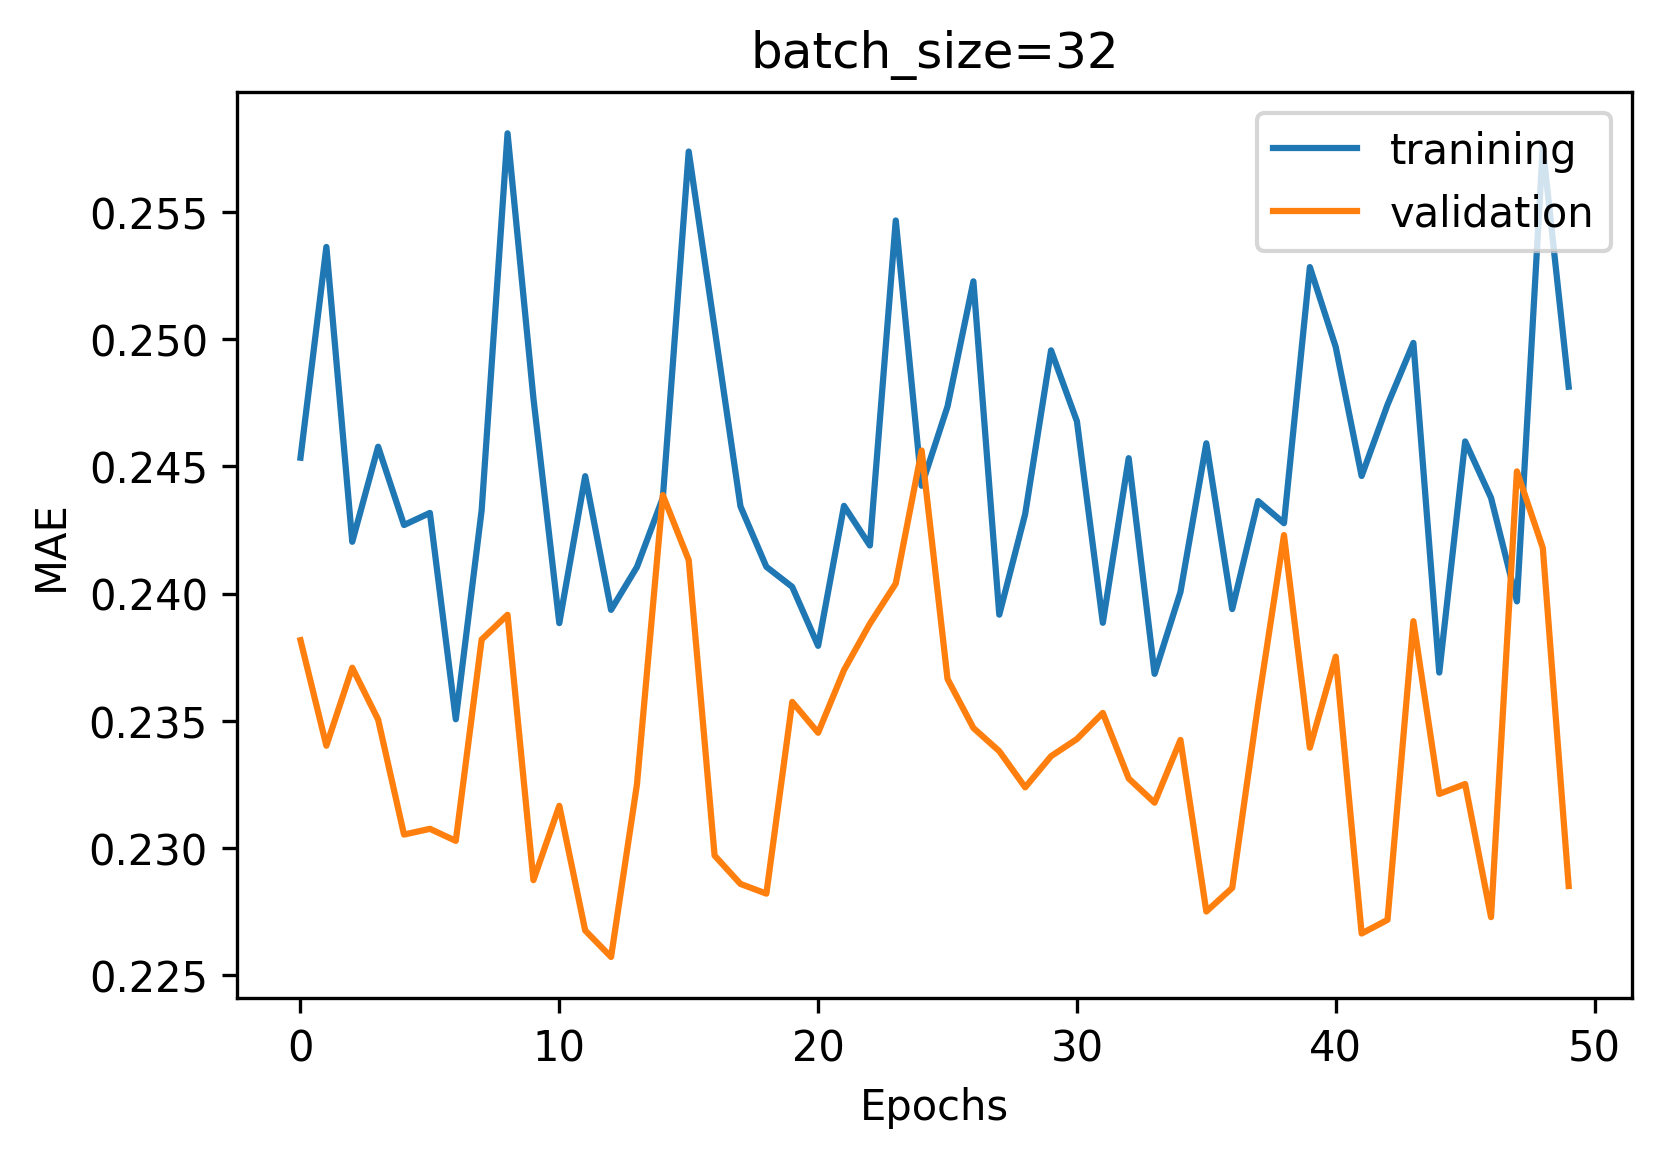

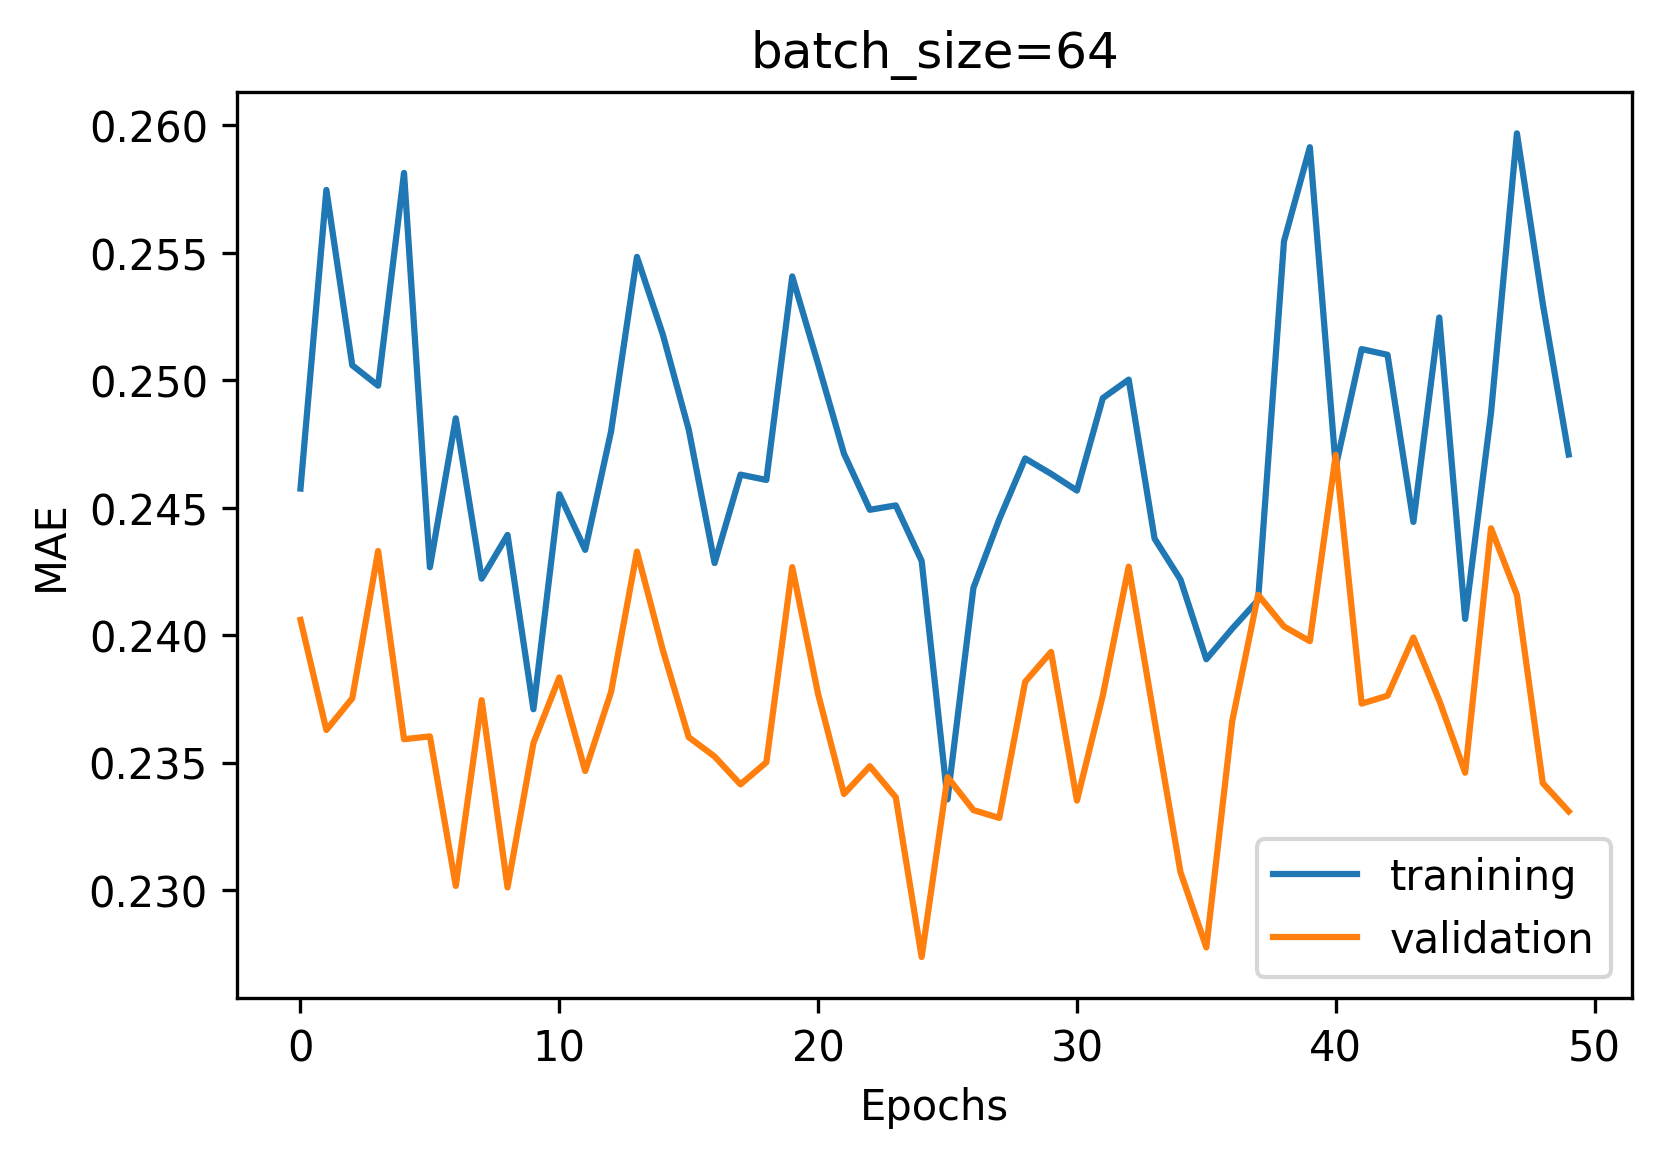

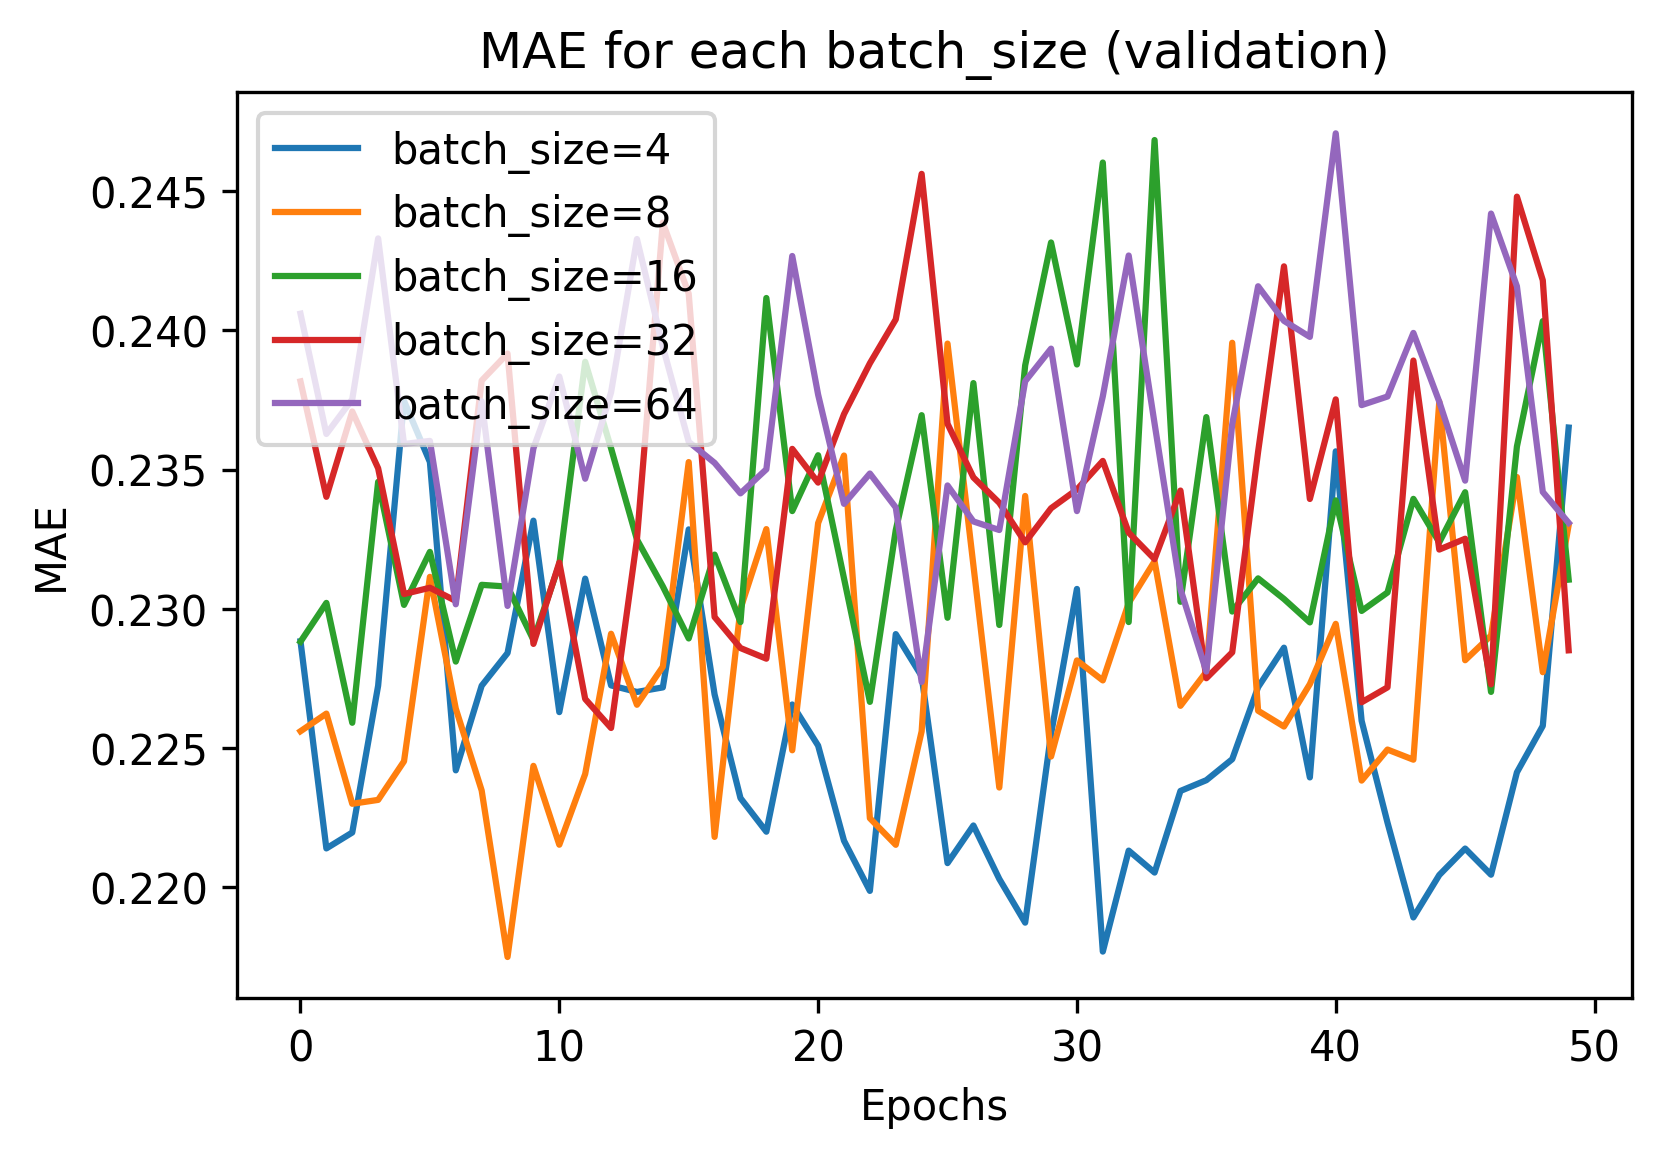

In [10]:
import matplotlib.pyplot as plt

# 画像の画質を設定
plt.rcParams['figure.dpi'] = 300

for param in parameters:
    for param_value, result in results['compare_{}'.format(param)].items():
        plt.plot(result.history['mae'],label="tranining")
        plt.plot(result.history['val_mae'],label="validation")
        plt.xlabel('Epochs')
        plt.ylabel('MAE')
        plt.title('{}={}'.format(param, str(param_value)))
        plt.legend()
        plt.show()
    
    if param != 'epochs':
        # fig = plt.figure()
        plt.xlabel('Epochs')
        plt.ylabel('MAE')
        for param_value, result in results['compare_{}'.format(param)].items():
            plt.plot(result.history['val_mae'],label='{}={}'.format(param, str(param_value)))
        plt.title('MAE for each {} (validation)'.format(param))
        plt.legend()
        plt.show()

In [11]:
from keras.models import load_model

results = {}
for param in parameters:
    results['compare_{}'.format(param)] = {}
    for param_value in param_value_dict[param]:
        model = load_model('model/titanic/compare_{}/{}.h5'.format(param, param_value))
        results['compare_{}'.format(param)][param_value] = model.evaluate(X_test,Y_test,batch_size=8)

16/16 [==============================] - 0s 572us/step - loss: 0.1328 - mae: 0.2159


In [12]:
results

{'compare_validation_split': {0.1: [0.13378113508224487, 0.23401135206222534],
  0.2: [0.13469673693180084, 0.21589547395706177],
  0.3: [0.13167564570903778, 0.20950843393802643],
  0.4: [0.133423313498497, 0.2151441127061844],
  0.5: [0.1346994936466217, 0.21473029255867004]},
 'compare_epochs': {10: [0.13294090330600739, 0.21822677552700043],
  50: [0.13558650016784668, 0.2164633870124817],
  100: [0.13578513264656067, 0.21407994627952576],
  150: [0.13672448694705963, 0.21927718818187714],
  200: [0.13502904772758484, 0.21549434959888458]},
 'compare_batch_size': {4: [0.1407642513513565, 0.2285848706960678],
  8: [0.13369649648666382, 0.217716783285141],
  16: [0.13366104662418365, 0.21314814686775208],
  32: [0.13582643866539001, 0.21168173849582672],
  64: [0.13283246755599976, 0.21590326726436615]}}

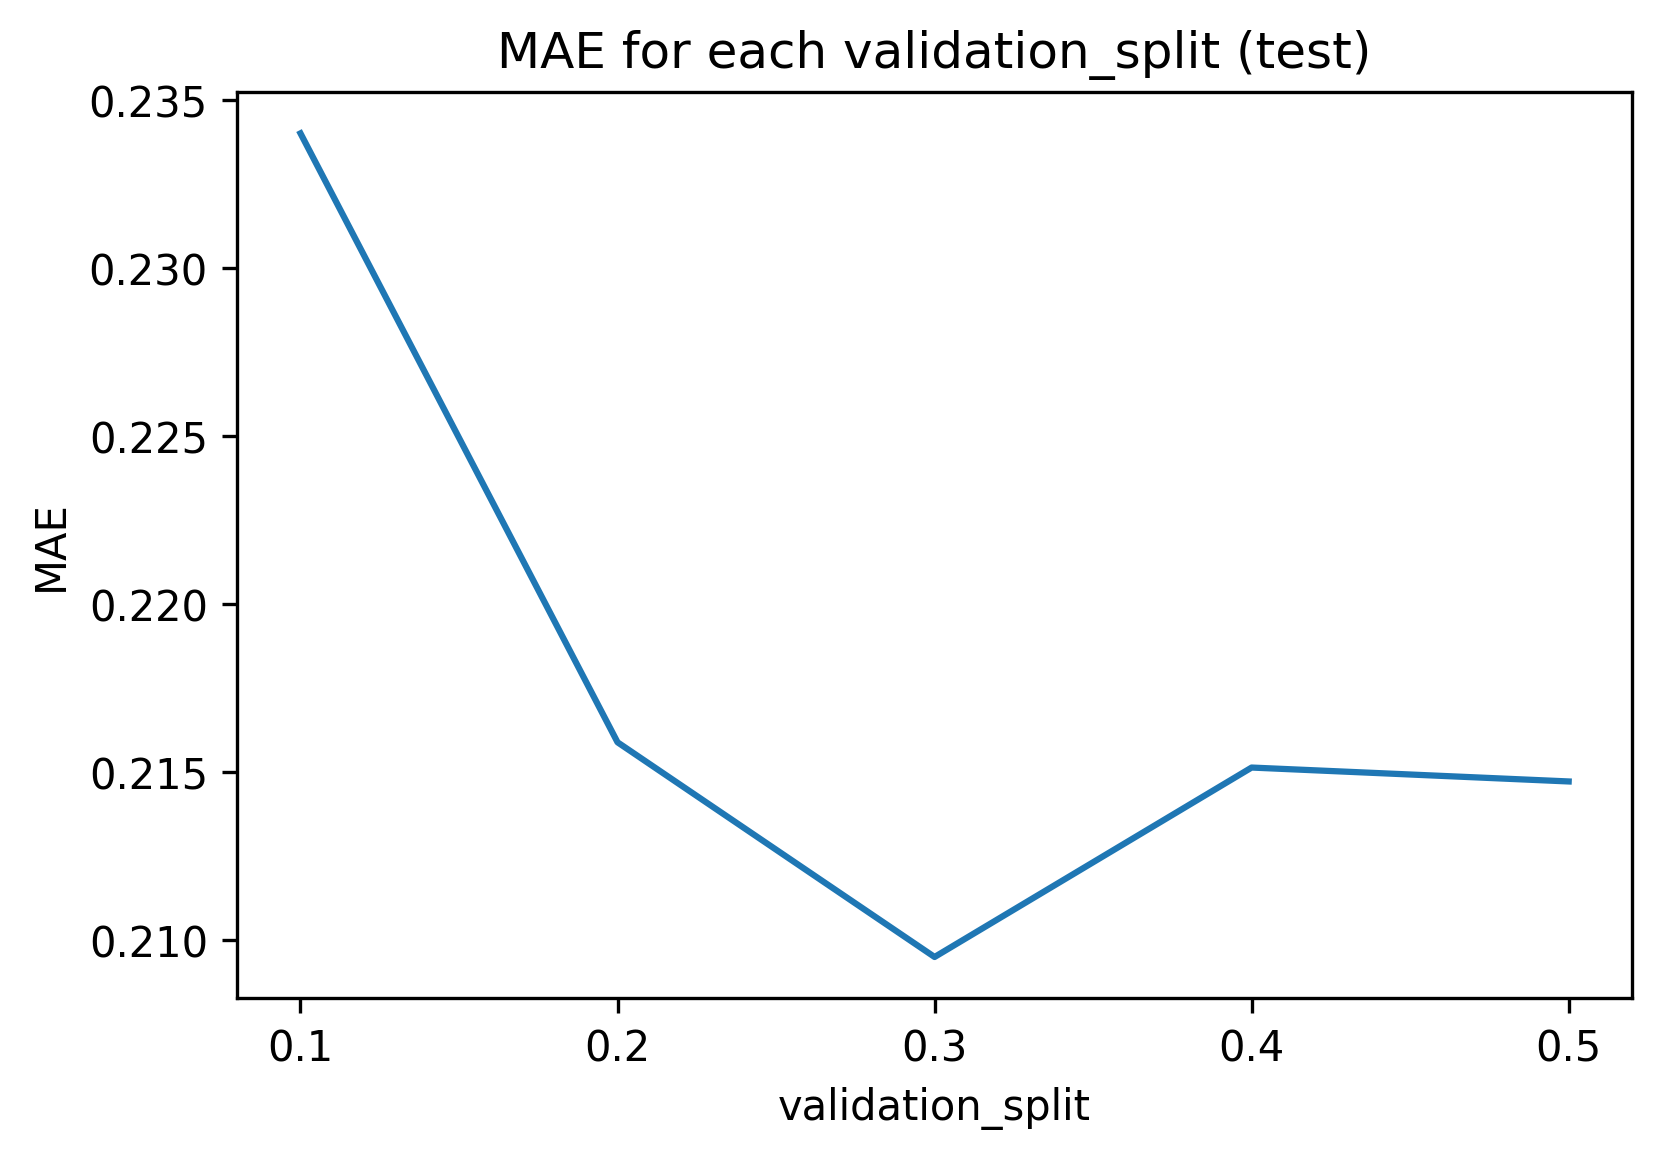

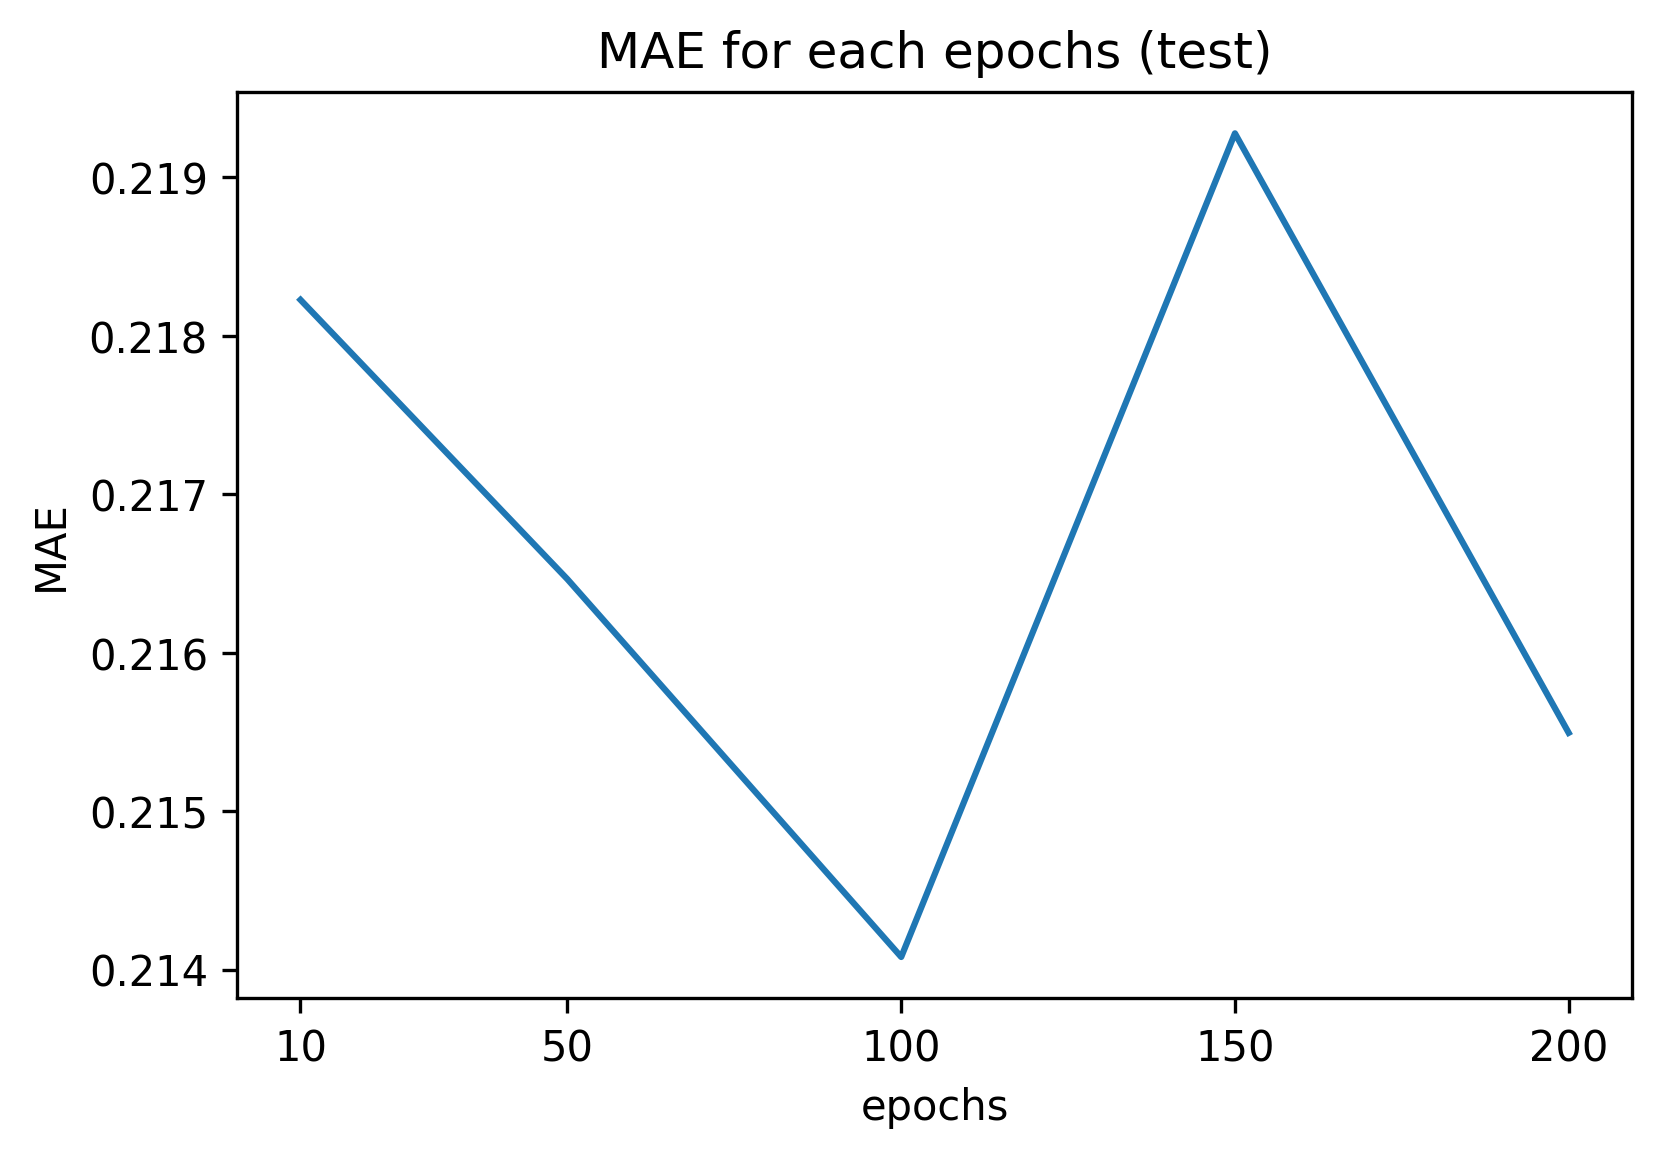

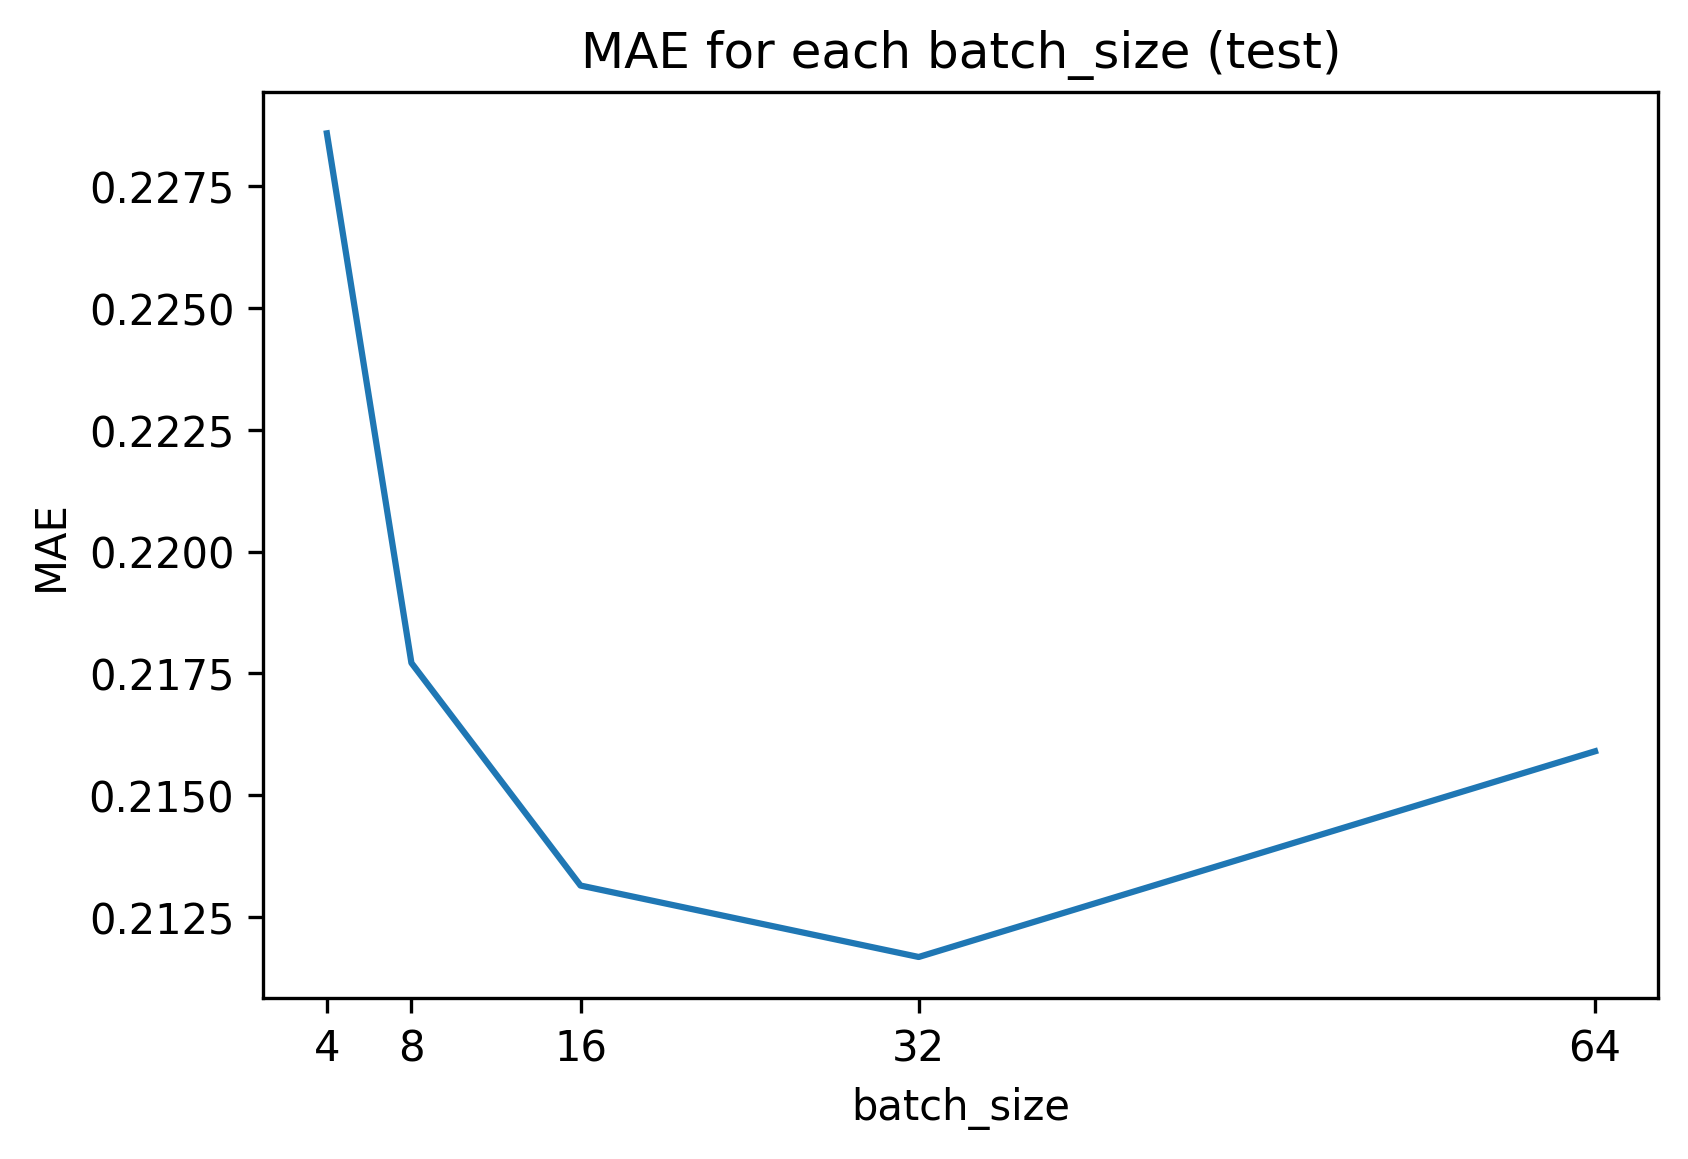

In [13]:
for param in parameters:
    fig = plt.figure()
    plt.title('MAE for each {} (test)'.format(param))
    plt.xlabel(param)
    plt.ylabel('MAE')
    x = list(results['compare_{}'.format(param)].keys())
    y = [performance[1] for param_value, performance in results['compare_{}'.format(param)].items()]
    plt.plot(x, y)
    plt.xticks(x)
    plt.show()
    file_path = 'compare_{}.png'.format(param)
    fig.savefig(file_path)